In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.gray()

256


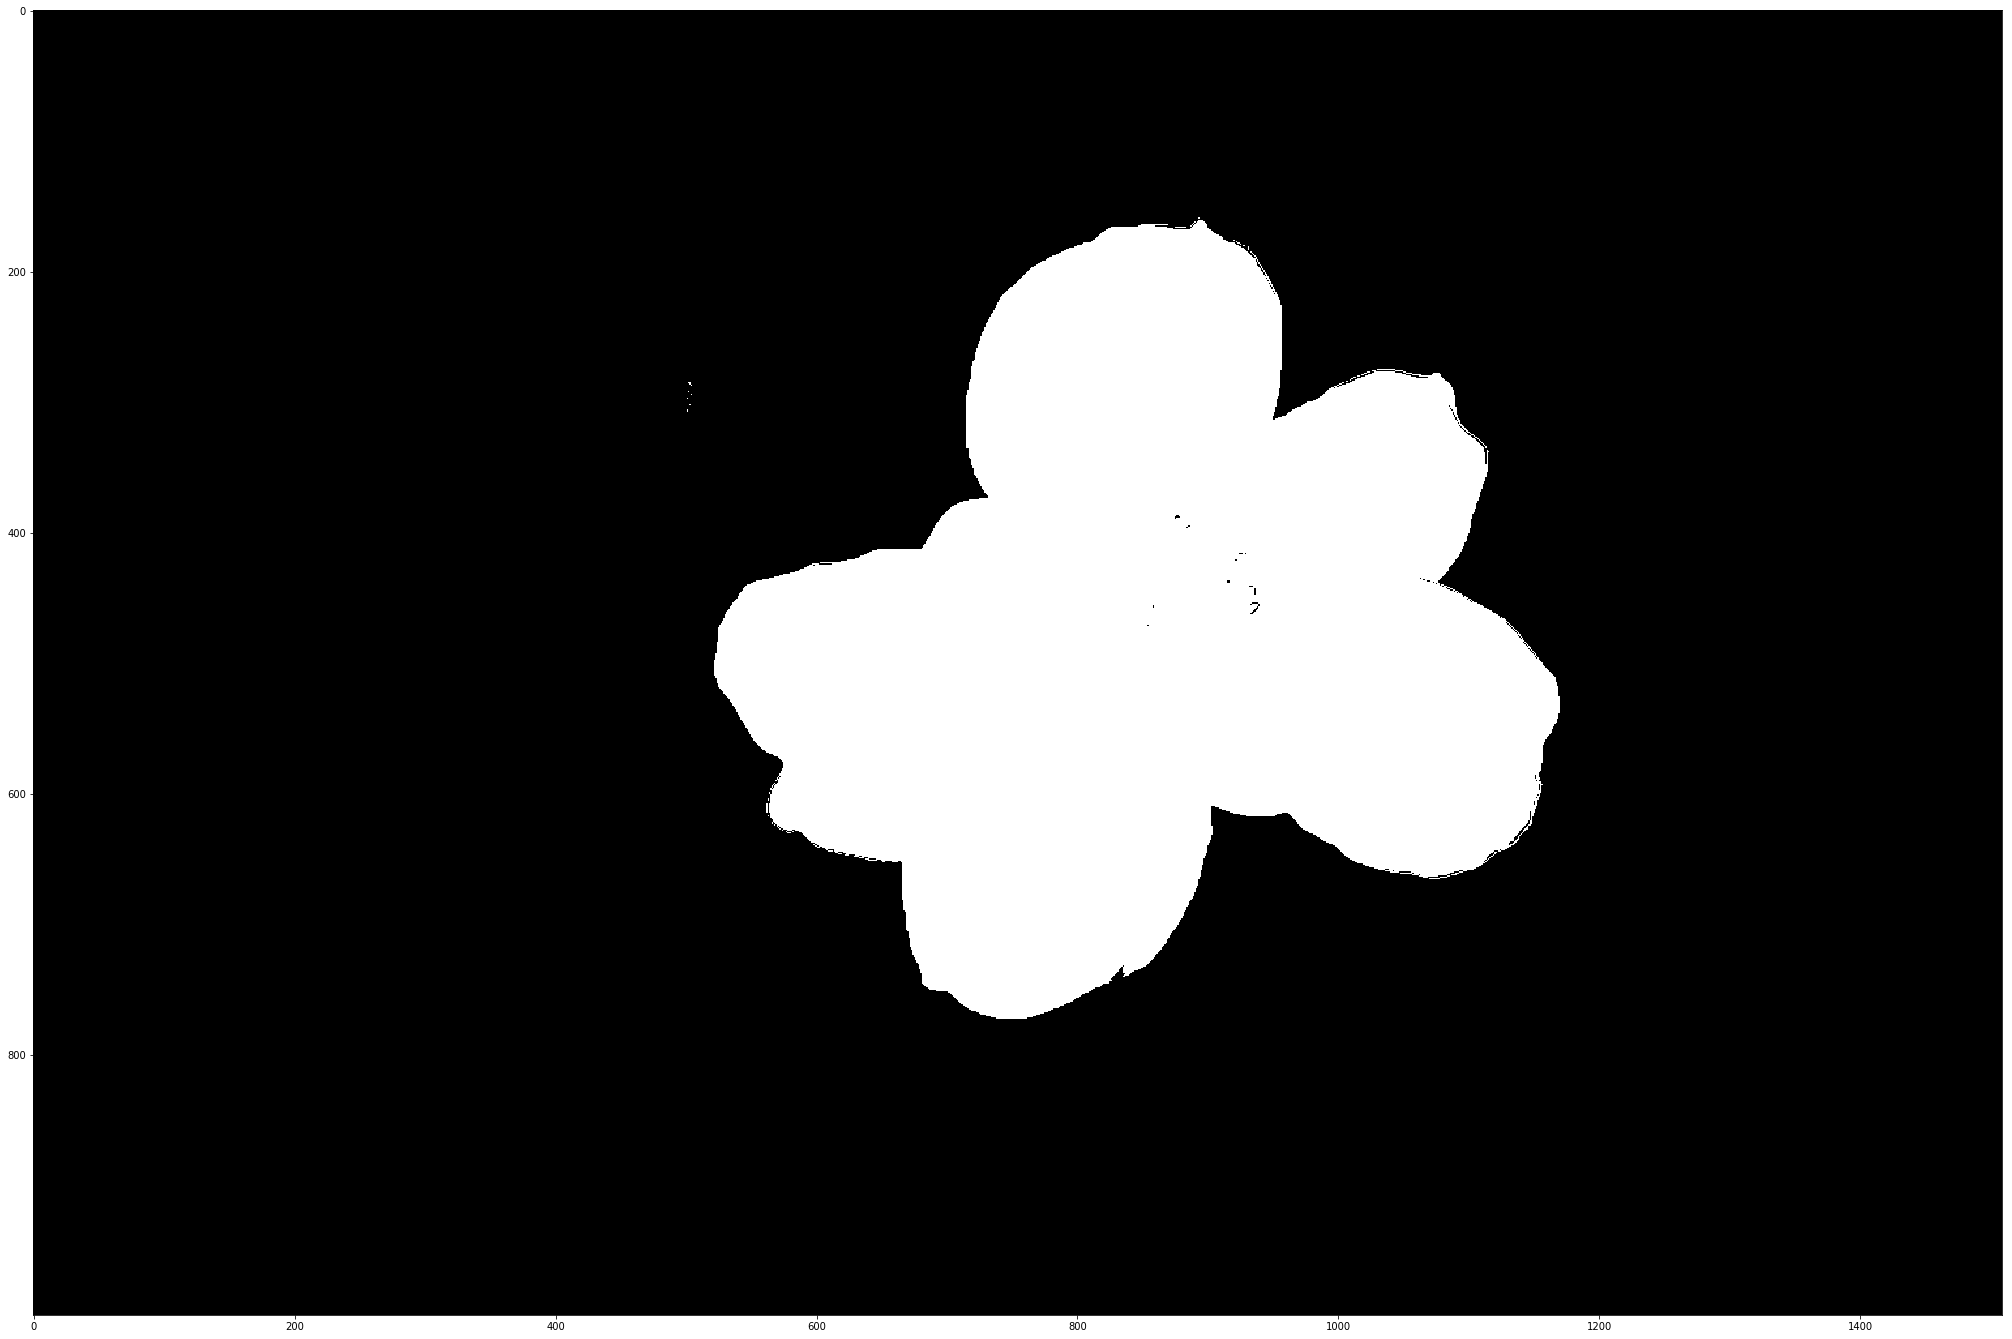

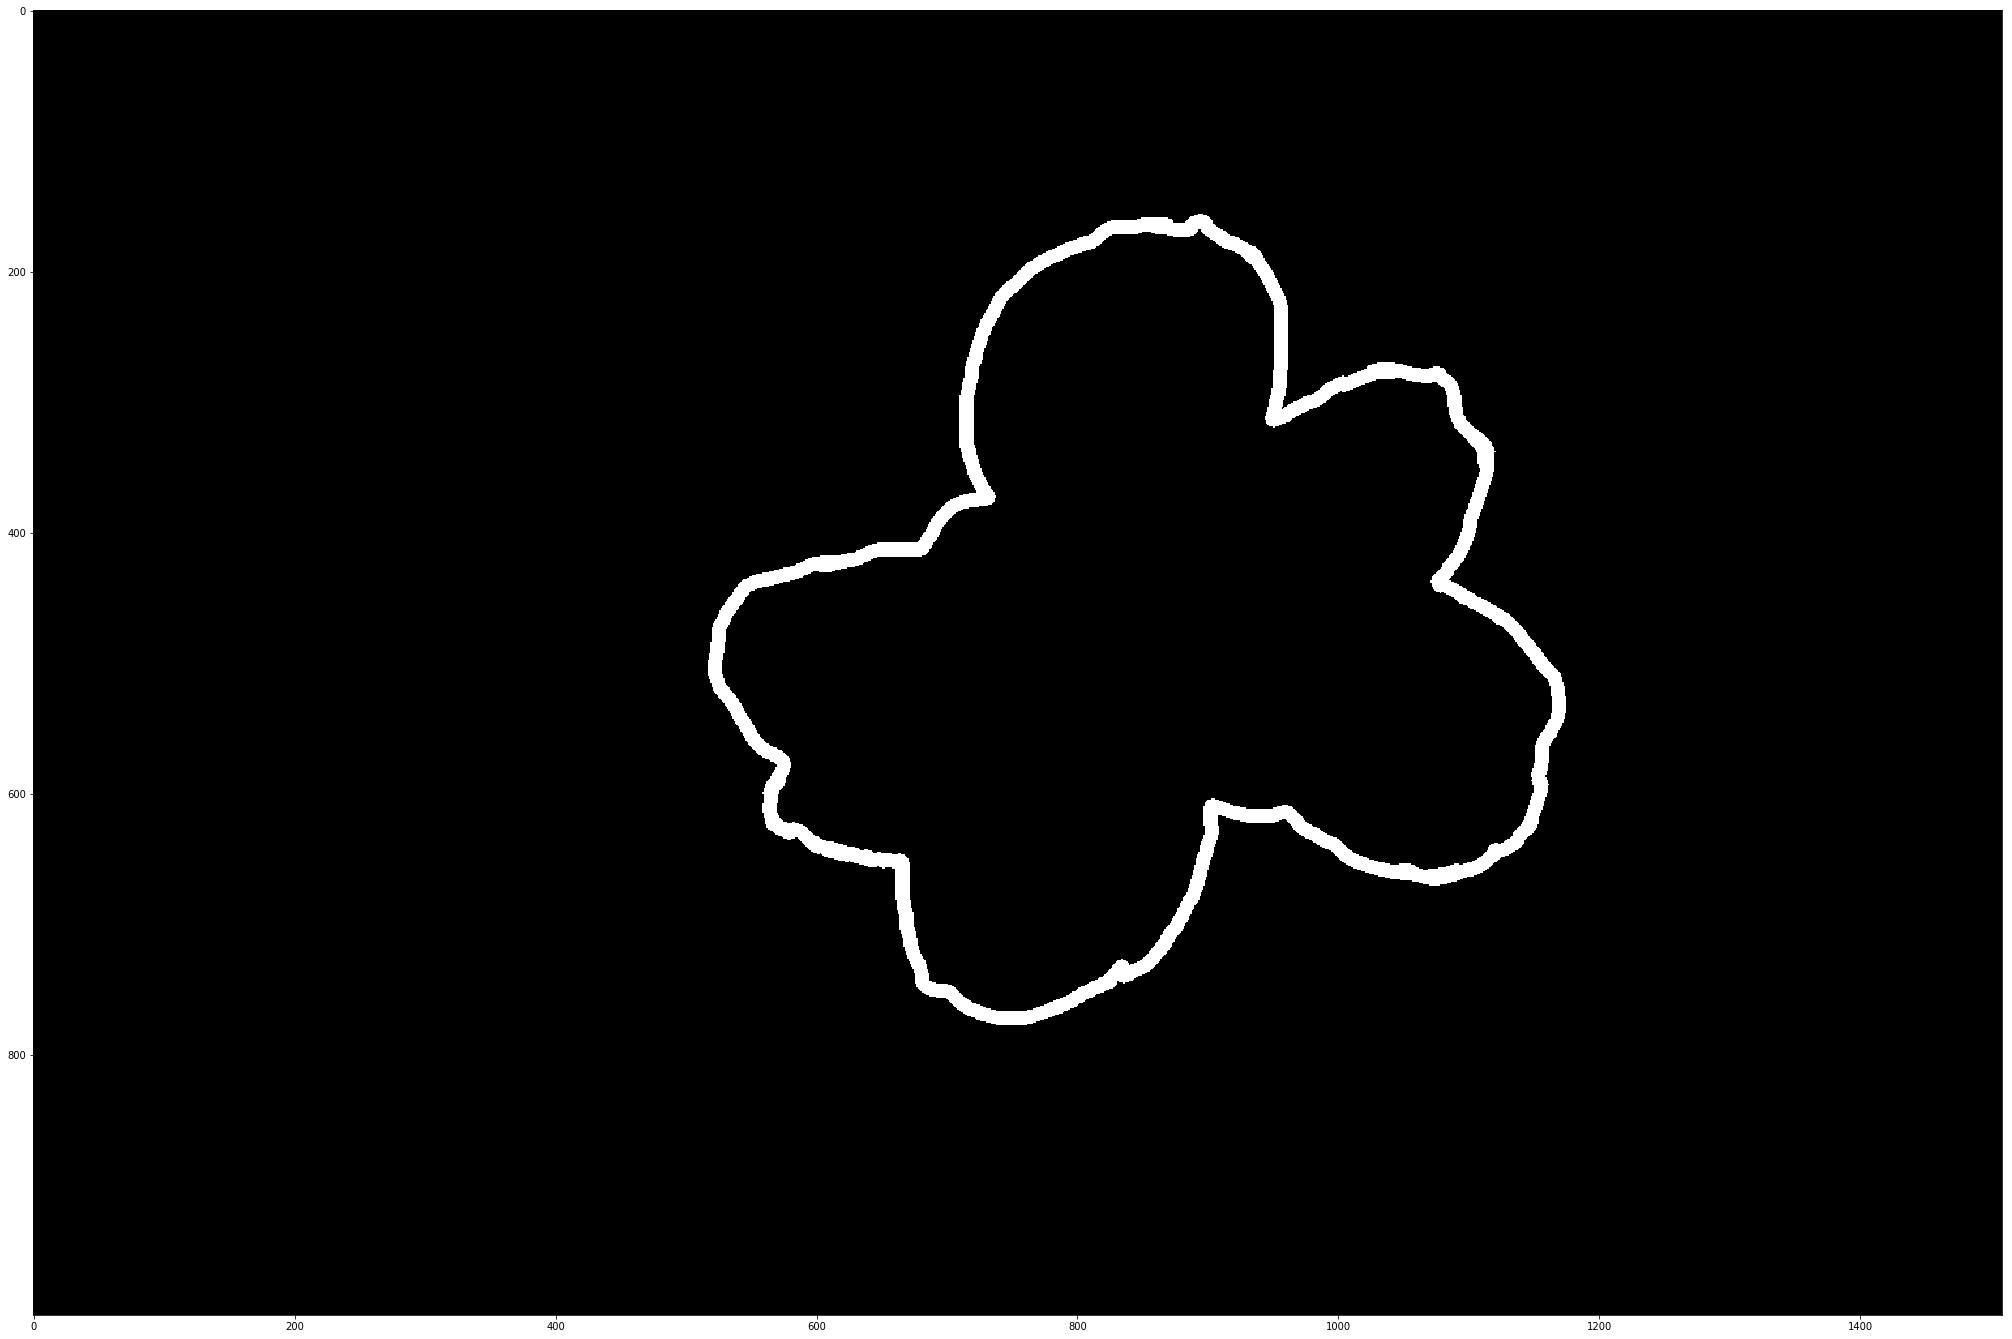

(1000, 1509, 3) (1000, 1509, 3)


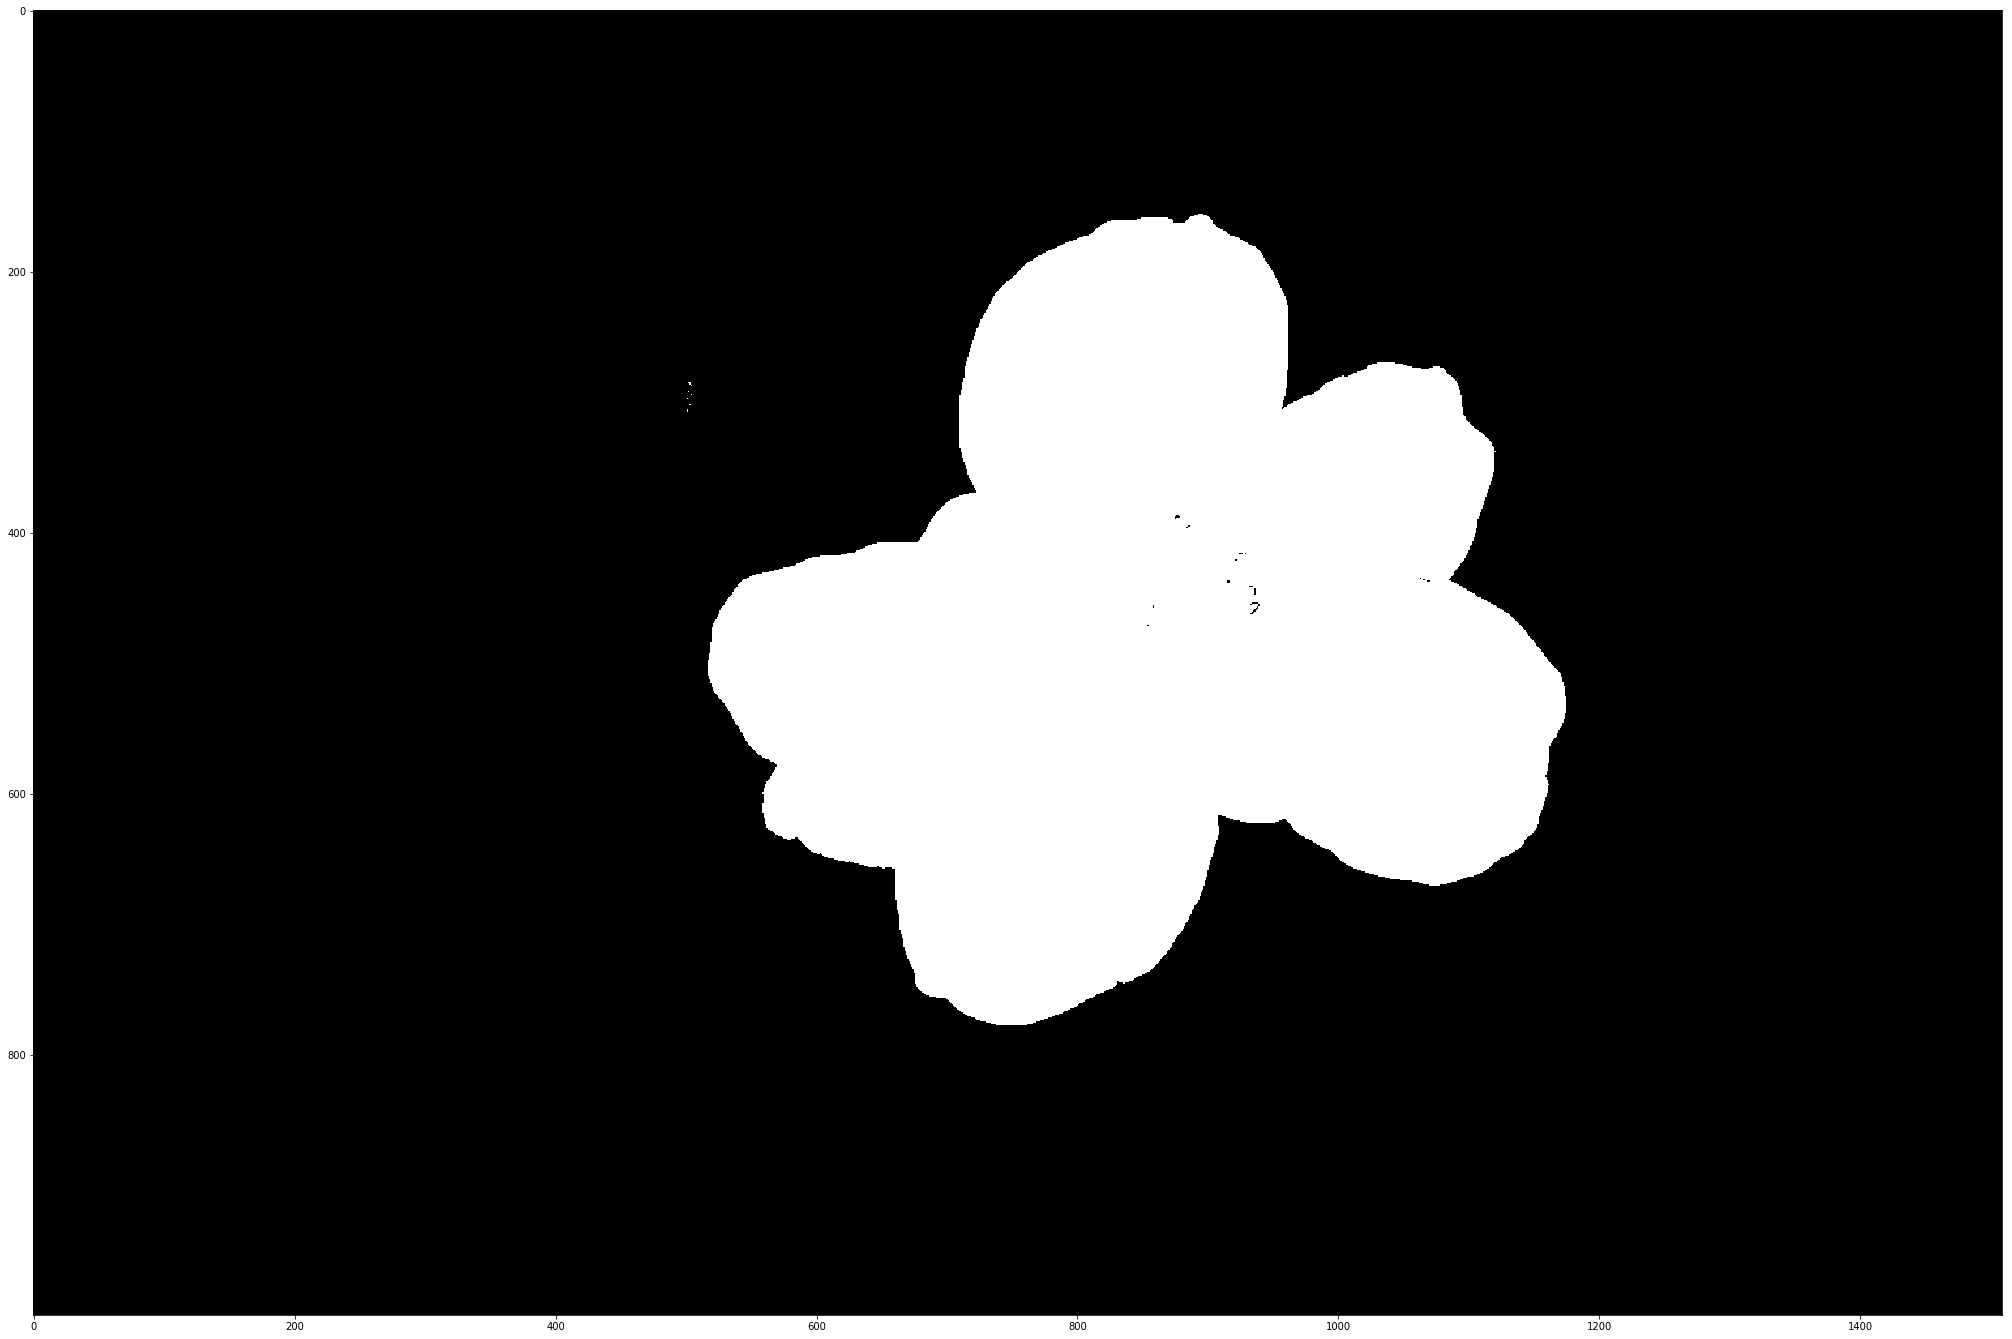

0.png


In [4]:
fnames = !ls /Users/nakatani/labo/grabcut/img/foreground_fixed
print(len(fnames))

cnt = 0
dir_path = '../../img/foreground_fixed/'
for fname in fnames:
    img = cv2.imread(dir_path + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blank = np.zeros(img.shape, np.uint8)
    _, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
    binary = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
    blank_rgb = cv2.cvtColor(blank,cv2.COLOR_GRAY2RGB)
    plt.figure(figsize=(36,24)) 
    plt.imshow(binary),plt.show()
#     cv2.imwrite('../../img/mask/' + fname, thresh)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for i in range(0, len(contours)):
        if len(contours[i]) > 0:

            # remove small objects
            if cv2.contourArea(contours[i]) < 1500:
                continue

#             blank = cv2.polylines(blank, contours[i], True, (255, 255, 255), 8)
            blank_rgb = cv2.polylines(blank_rgb, contours[i], True, (255, 255, 255), 10)
#             blank_rgb = cv2.dilate(blank,None)
#             blank = cv2.dilate(blank,None)
#             blank = cv2.dilate(blank,None)
#             blank = cv2.dilate(blank,None)
            
    plt.figure(figsize=(36,24)) 
    plt.imshow(blank_rgb), plt.show()
    print(binary.shape, blank_rgb.shape)
    mask_boun = cv2.bitwise_or(binary, blank_rgb)
    plt.figure(figsize=(36,24)) 
    plt.imshow(mask_boun),plt.show()
    print(fname)
    # save
#     cv2.imwrite('../../img/boundary/' + fname, blank)
    break



# 岩村先生案の実験

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
plt.gray()

## 最新boundary製造機

In [9]:
fnames = !ls /Users/nakatani/labo/grabcut/img/foreground2
print(len(fnames))

cnt = 0
kernel = np.ones((5,5),np.uint8)
dir_path = '../../img/foreground2/'
for fname in fnames:
    fname = '41.png'
    img = cv2.imread(dir_path + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    boundary = np.zeros(img.shape, np.uint8)
#     white = np.ones(img.shape) * 255
    _, thresh = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
#     binary = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
#     blank_rgb = cv2.cvtColor(blank,cv2.COLOR_GRAY2RGB)
#     plt.figure(figsize=(36,24)) 
#     plt.imshow(thresh),plt.show()
#     cv2.imwrite('../../img/mask/' + fname, thresh)
    
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    for i in range(0, len(contours)):
        if len(contours[i]) > 0:

            # remove small objects
            if cv2.contourArea(contours[i]) < 1500:
                continue

#             blank = cv2.polylines(blank, contours[i], True, (255, 255, 255), 8)
            boundary = cv2.polylines(boundary, contours[i], True, 255 , 2)
#             blank = cv2.dilate(blank,kernel)

            
#     plt.figure(figsize=(36,24)) 
#     plt.imshow(boundary), plt.show()
#     print(thresh.shape, boundary.shape)
#     mask = cv2.bitwise_or(thresh, boundary)
    mask = thresh + 0

    mask = cv2.dilate(mask,kernel,iterations = 1)
    mask = cv2.erode(mask,kernel,iterations = 2)
    mask = cv2.dilate(mask,kernel,iterations = 1)
#     boundary = cv2.erode(boundary,kernel,iterations = 1)

    cv2.imwrite('../../img/mask2/' + fname, mask)
#     plt.figure(figsize=(36,24)) 
#     plt.imshow(mask),plt.show()
    print(fname)

    # save
    cv2.imwrite('../../img/boundary2/' + fname, boundary)
    break

252
41.png


In [3]:
img.shape

(978, 1478)

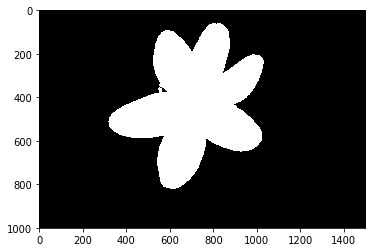

255.png


True

In [27]:
fname = '255.png'

img = cv2.imread(dir_path + fname)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blank = np.zeros(img.shape)
white = np.ones(img.shape) * 255
_, thresh = cv2.threshold(img, 30, 255, cv2.THRESH_BINARY)
binary = cv2.cvtColor(thresh,cv2.COLOR_GRAY2RGB)
plt.imshow(binary),plt.show()
cv2.imwrite('../../img/mask/' + fname, thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
for i in range(0, len(contours)):
    if len(contours[i]) > 0:

        # remove small objects
        if cv2.contourArea(contours[i]) < 1500:
            continue

        blank = cv2.polylines(blank, contours[i], True, (255, 255, 255), 5)

#     plt.imshow(blank)
#     plt.show()
print(fname)
#     if cnt == 5:
#         break
#     cnt += 1

# save
cv2.imwrite('../../img/boundary/' + fname, blank)

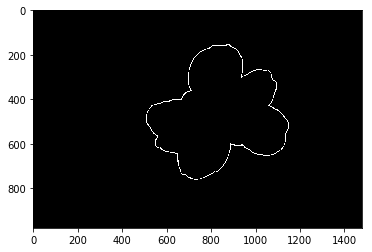

0.png


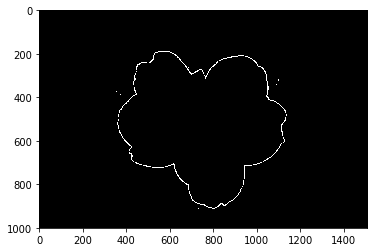

1.png


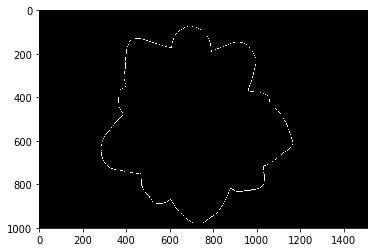

10.png


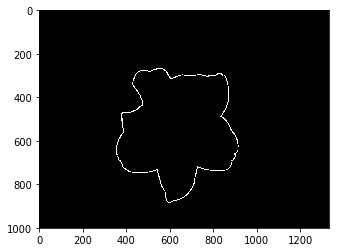

100.png


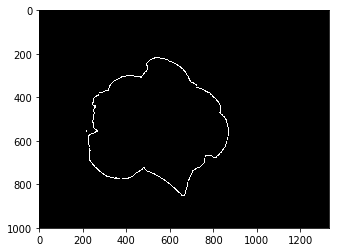

101.png


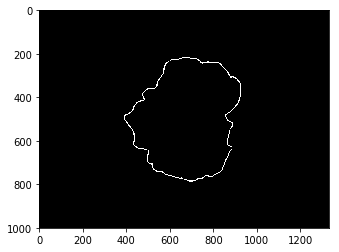

102.png


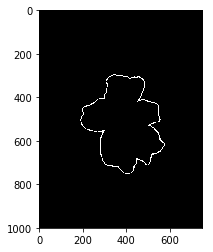

103.png


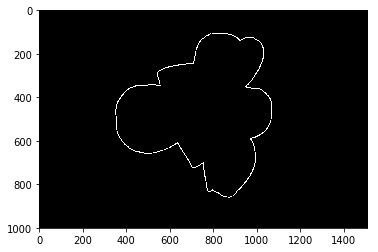

104.png


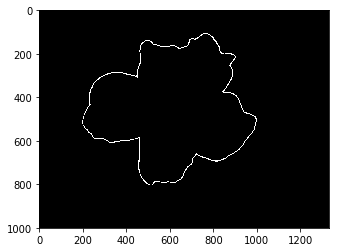

105.png


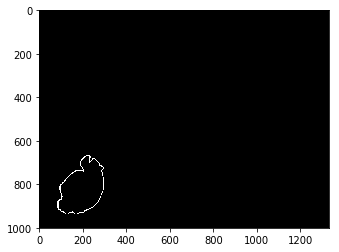

106.png


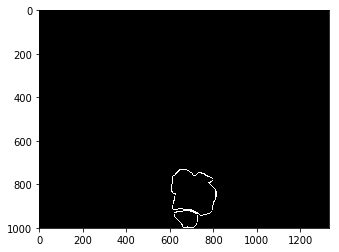

107.png


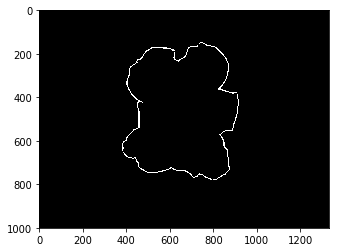

108.png


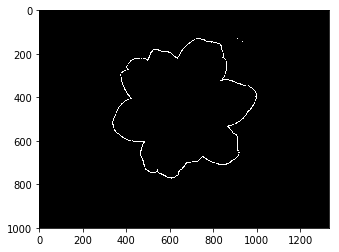

109.png


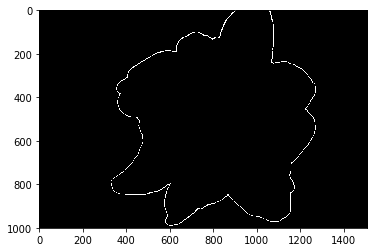

11.png


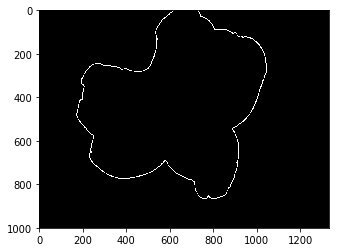

110.png


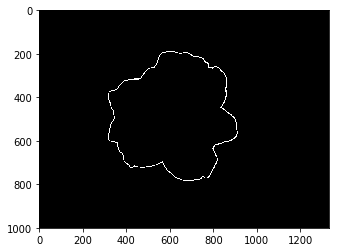

111.png


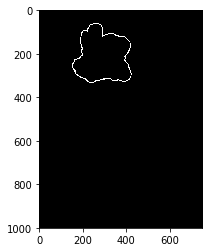

112.png


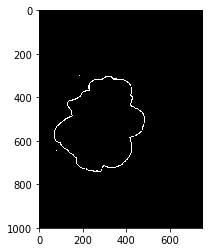

113.png


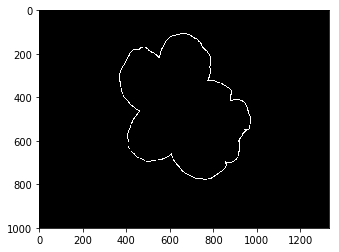

114.png


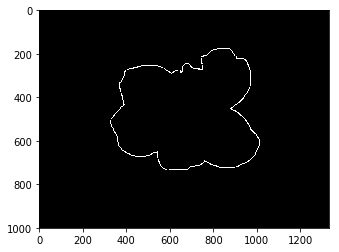

115.png


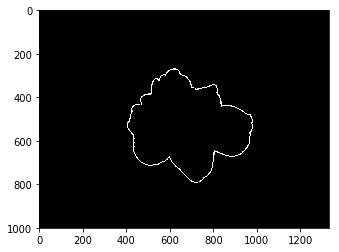

116.png


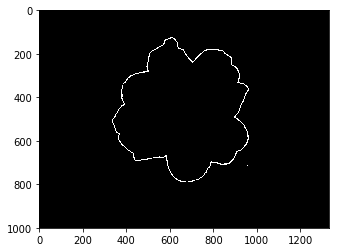

117.png


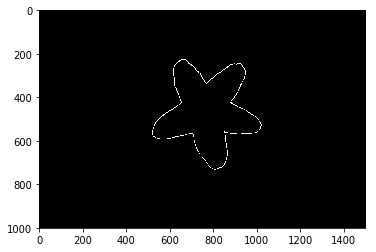

118.png


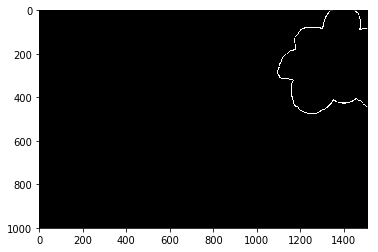

119.png


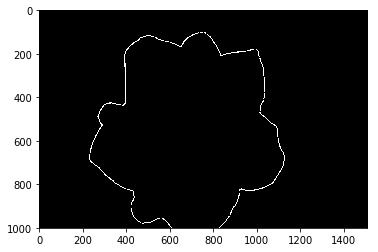

12.png


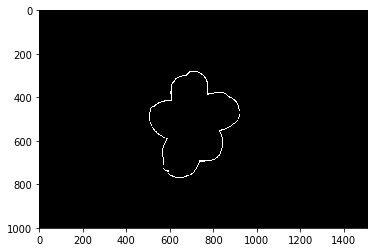

120.png


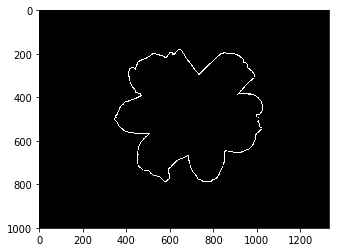

121.png


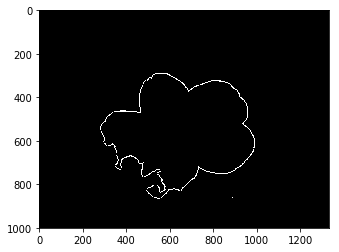

122.png


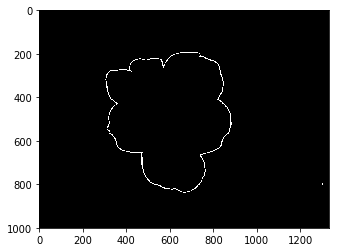

123.png


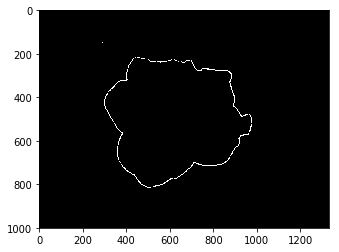

124.png


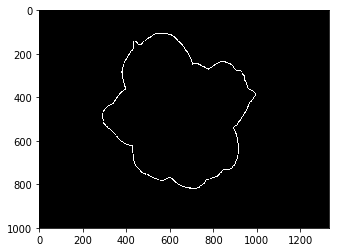

125.png


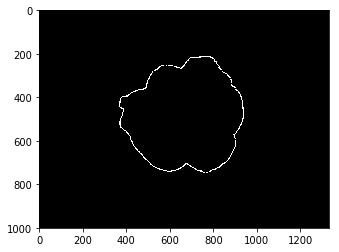

126.png


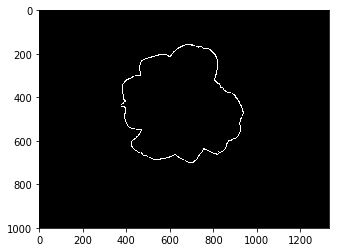

127.png


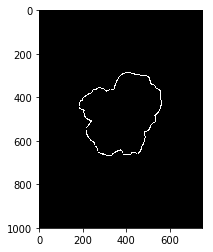

128.png


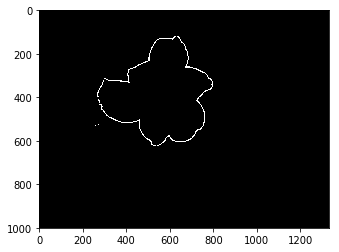

129.png


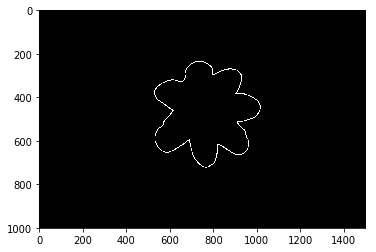

13.png


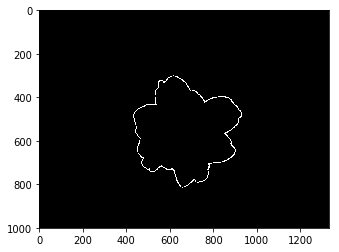

130.png


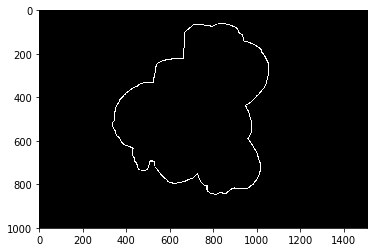

131.png


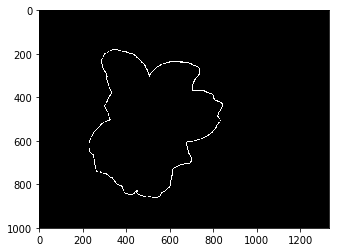

132.png


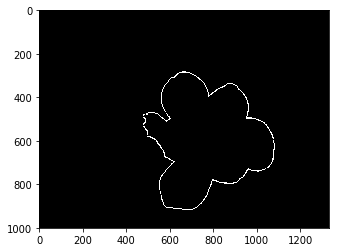

133.png


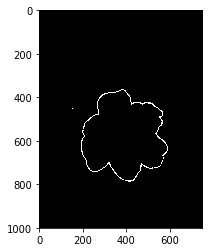

134.png


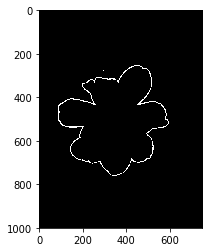

135.png


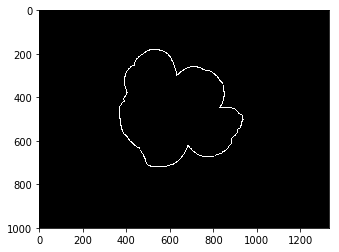

136.png


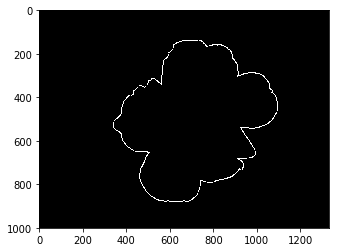

137.png


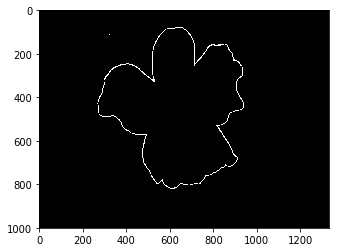

138.png


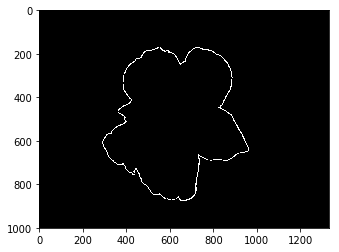

139.png


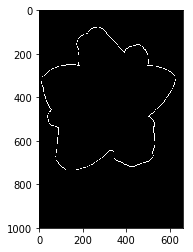

14.png


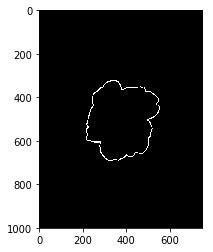

140.png


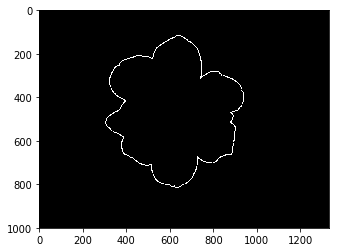

141.png


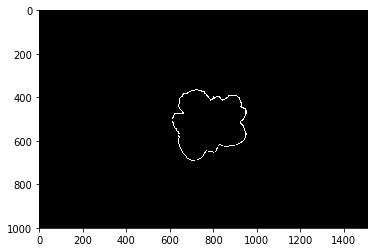

142.png


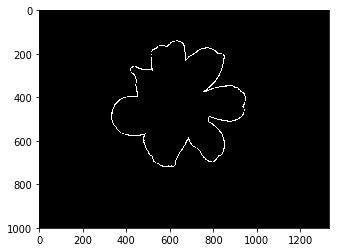

143.png


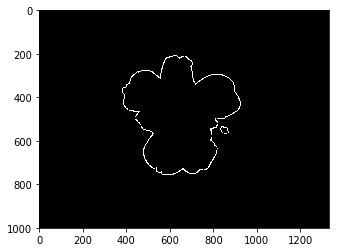

144.png


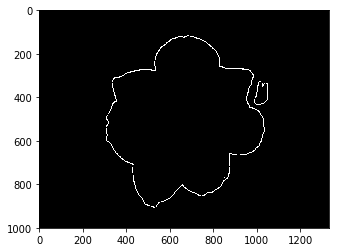

145.png


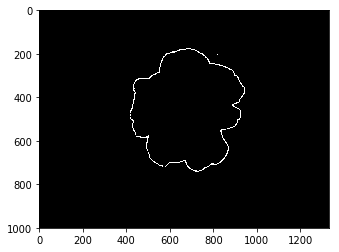

146.png


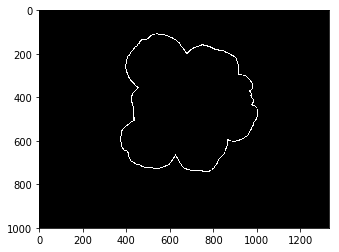

147.png


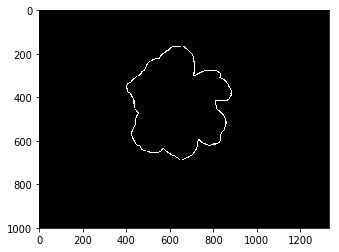

148.png


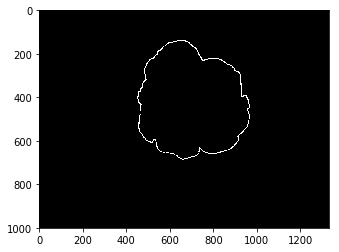

149.png


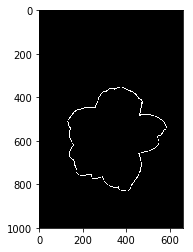

15.png


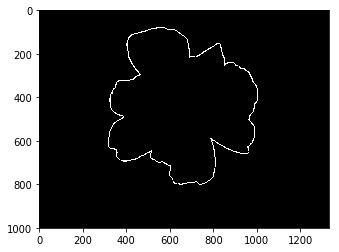

150.png


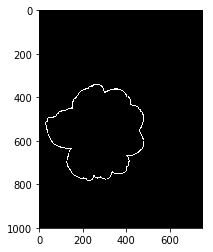

151.png


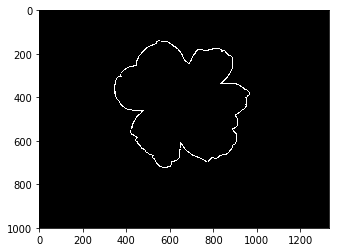

152.png


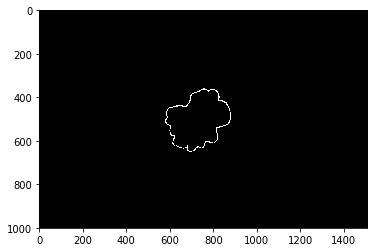

153.png


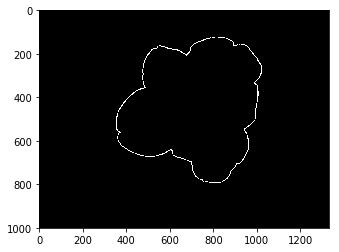

154.png


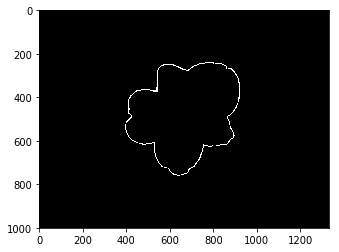

155.png


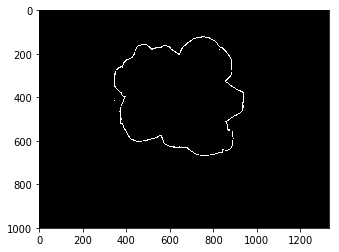

156.png


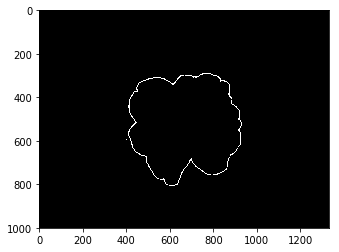

157.png


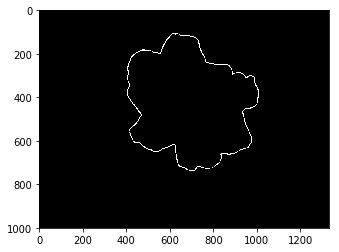

158.png


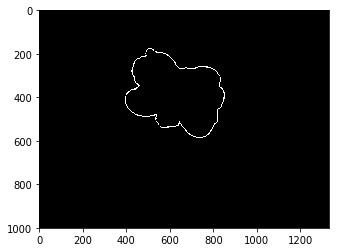

159.png


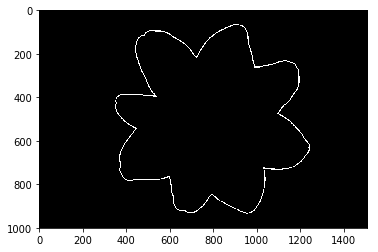

16.png


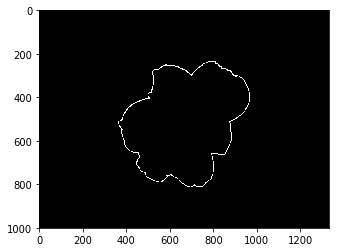

160.png


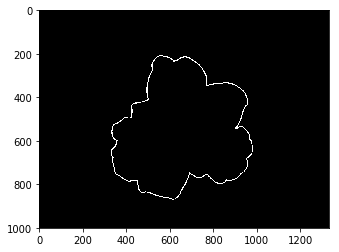

161.png


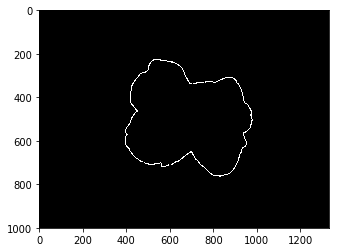

162.png


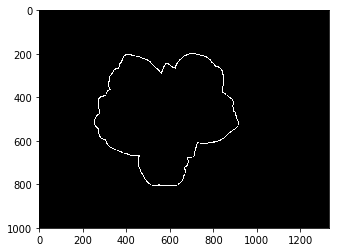

163.png


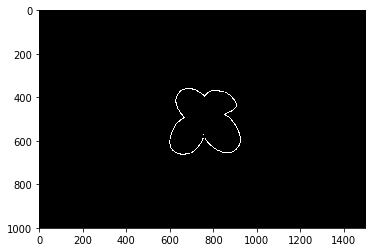

164.png


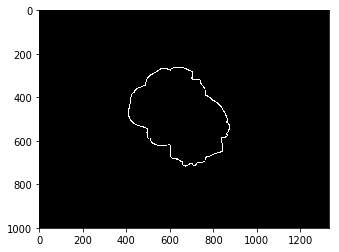

165.png


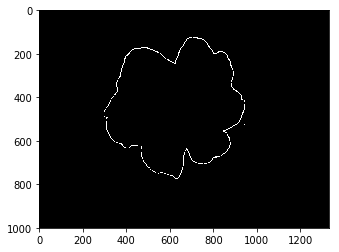

166.png


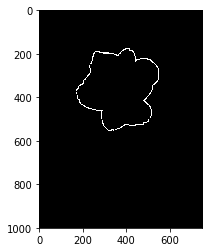

167.png


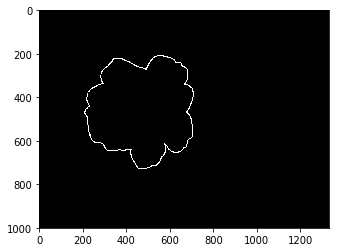

168.png


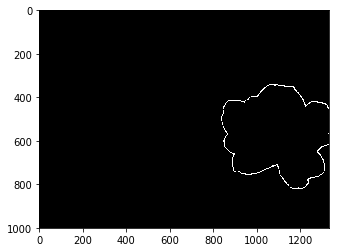

169.png


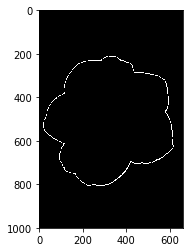

17.png


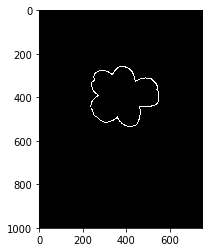

170.png


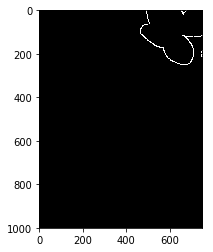

171.png


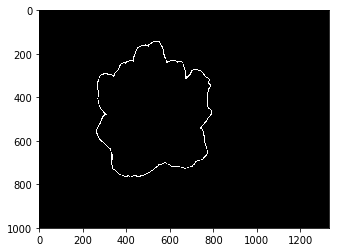

172.png


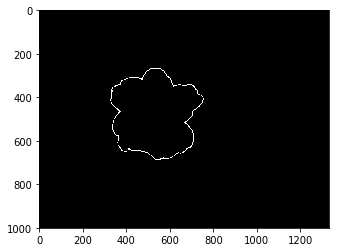

173.png


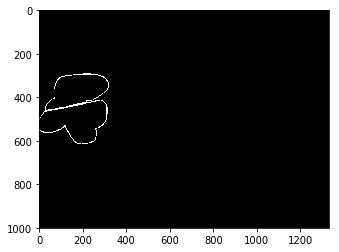

174.png


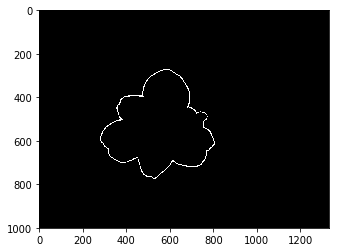

175.png


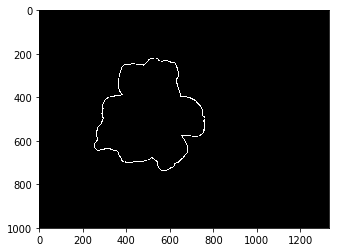

176.png


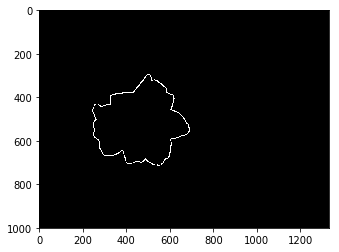

177.png


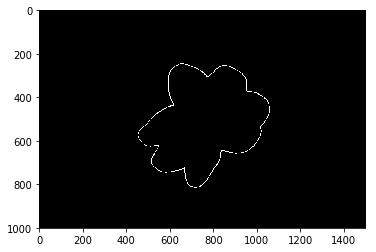

178.png


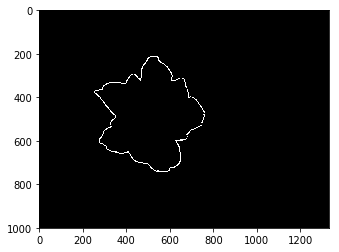

179.png


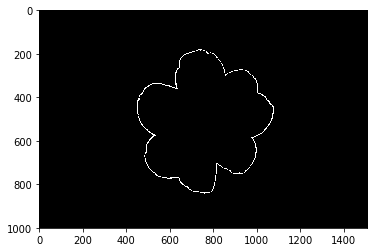

18.png


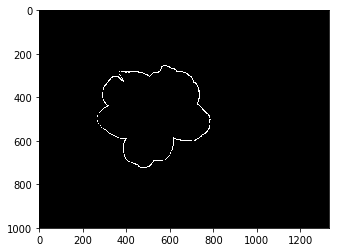

180.png


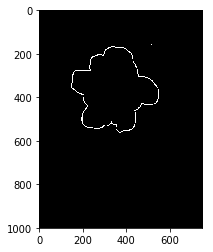

181.png


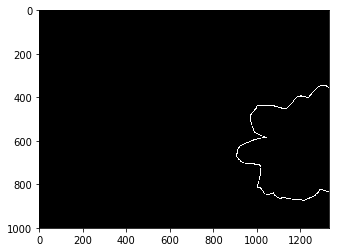

182.png


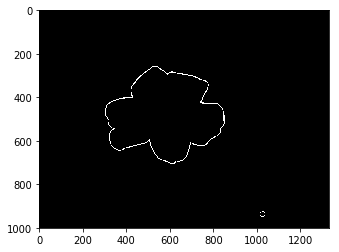

183.png


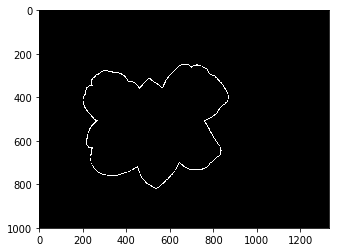

184.png


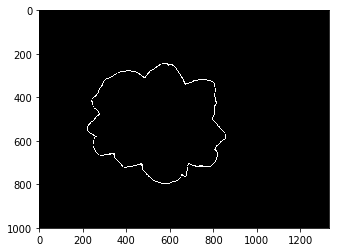

185.png


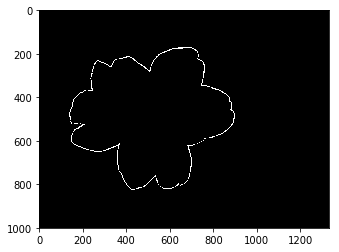

186.png


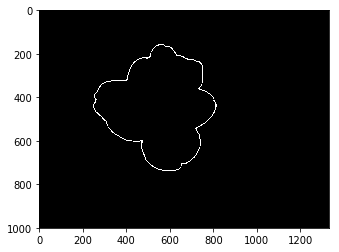

187.png


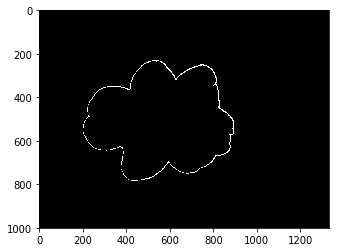

188.png


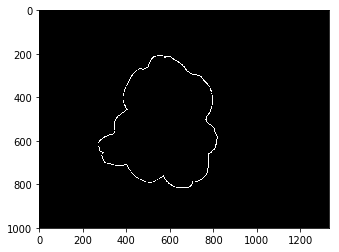

189.png


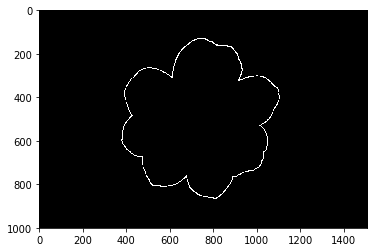

19.png


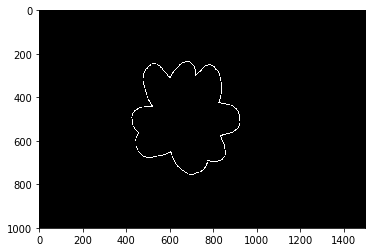

190.png


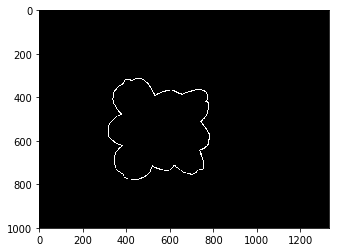

191.png


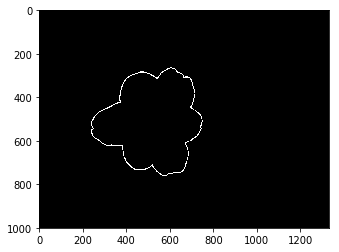

192.png


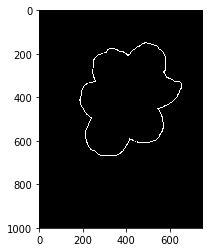

193.png


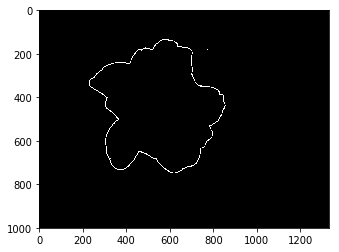

194.png


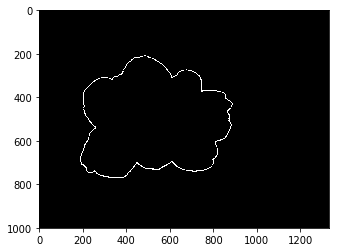

195.png


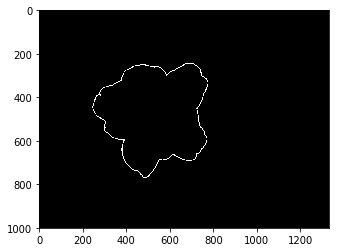

196.png


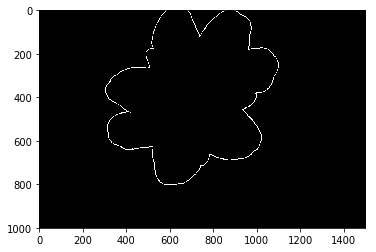

197.png


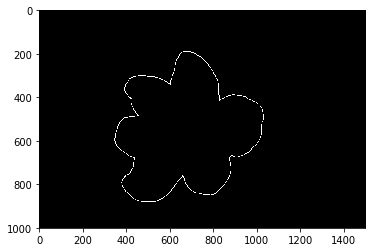

198.png


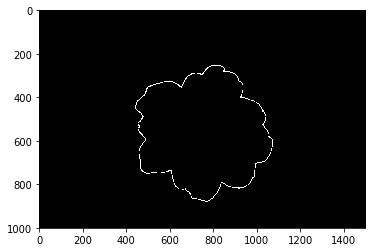

199.png


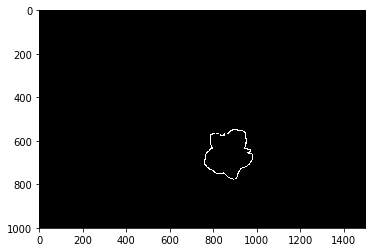

2.png


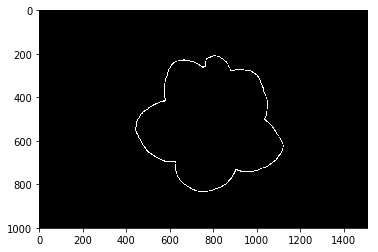

20.png


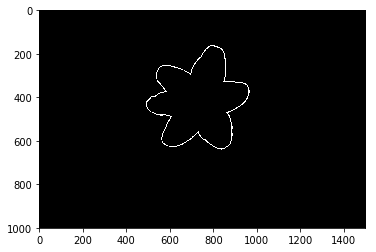

200.png


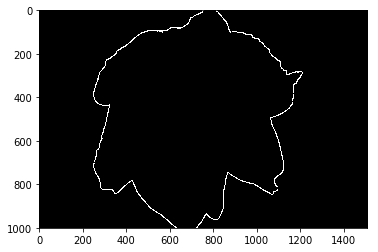

201.png


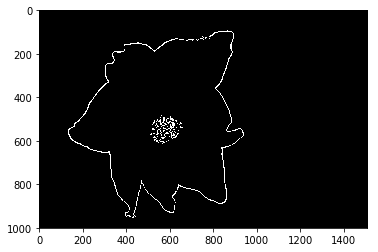

202.png


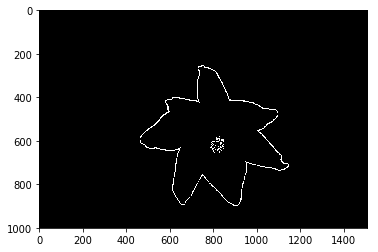

203.png


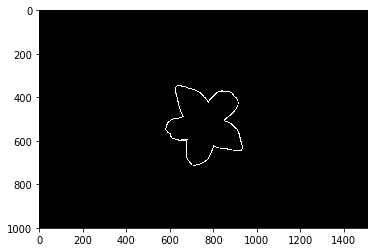

204.png


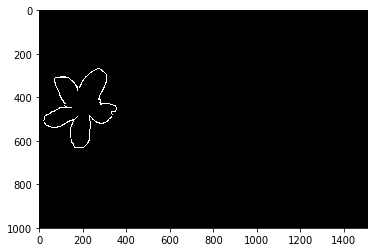

205.png


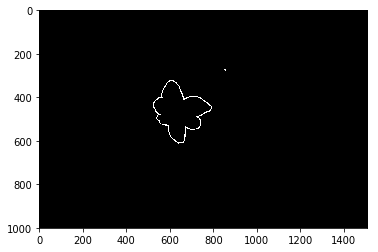

206.png


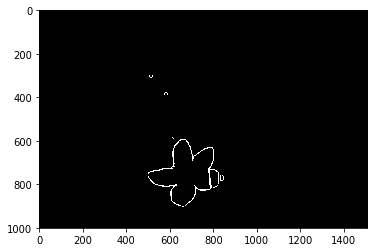

207.png


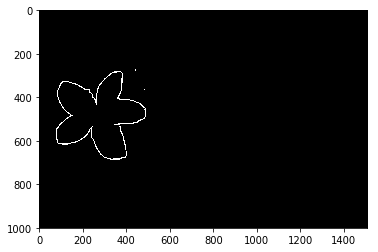

208.png


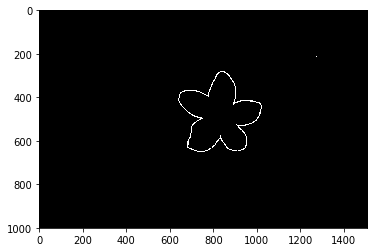

209.png


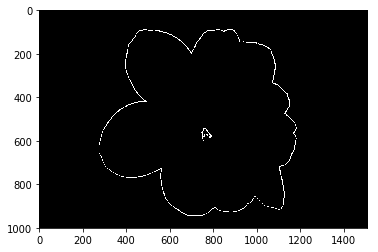

21.png


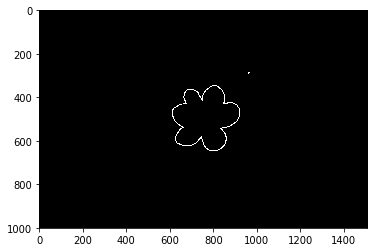

210.png


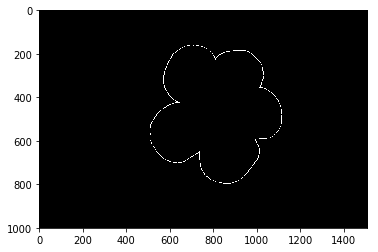

211.png


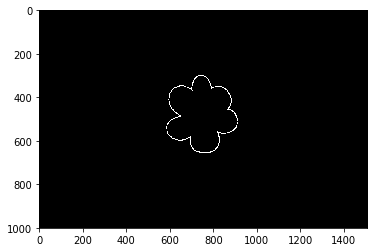

212.png


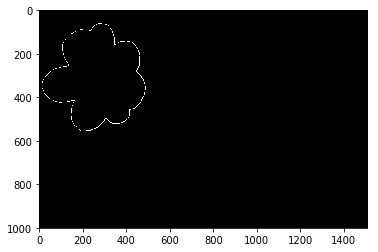

213.png


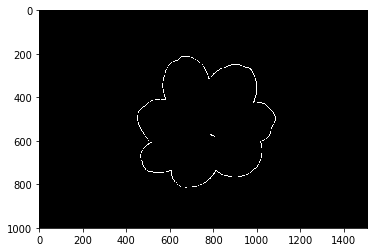

214.png


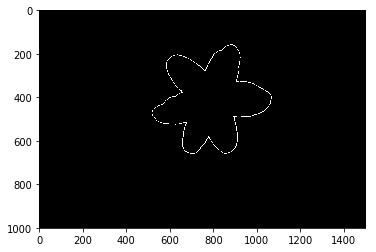

215.png


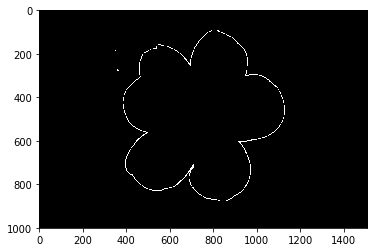

216.png


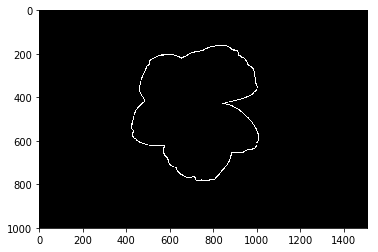

217.png


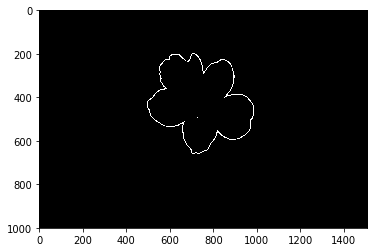

218.png


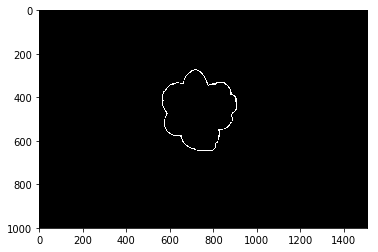

219.png


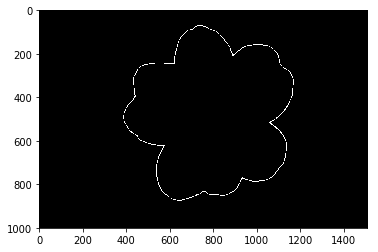

22.png


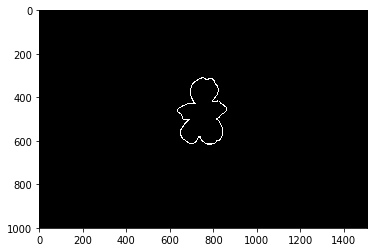

220.png


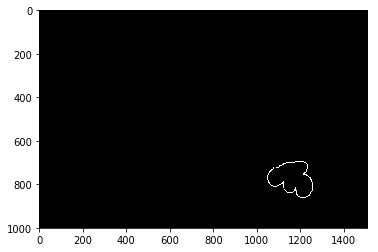

221.png


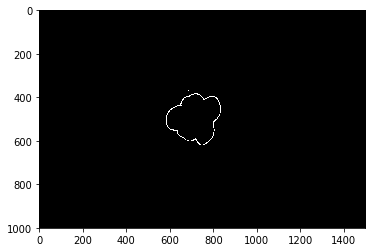

222.png


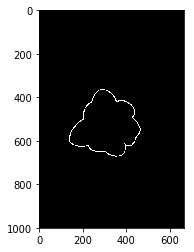

223.png


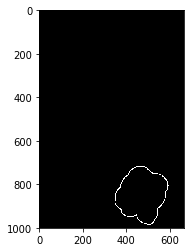

224.png


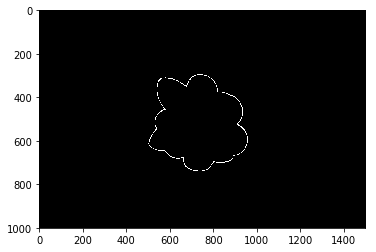

225.png


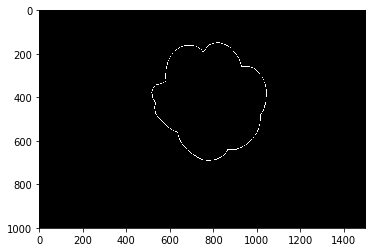

226.png


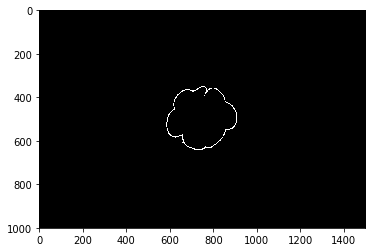

227.png


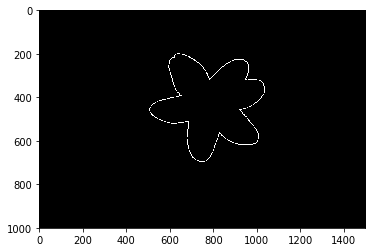

228.png


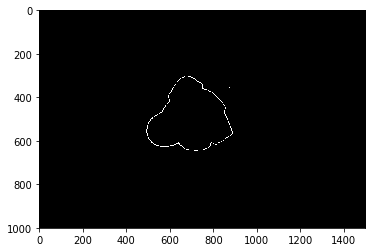

229.png


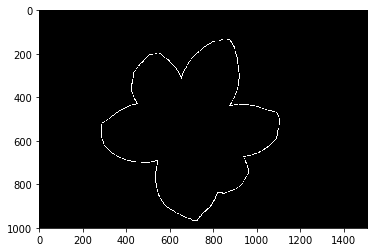

23.png


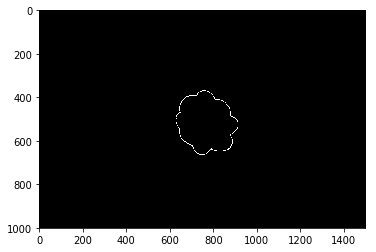

230.png


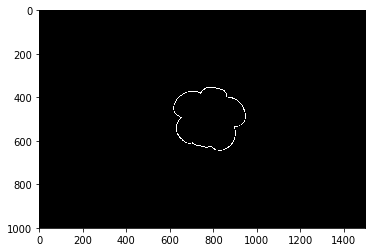

231.png


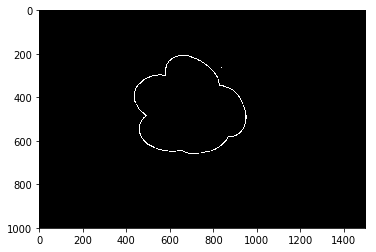

232.png


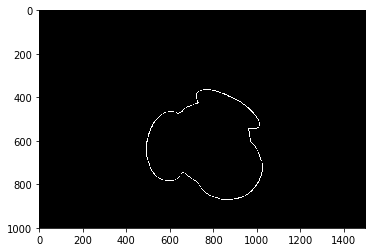

233.png


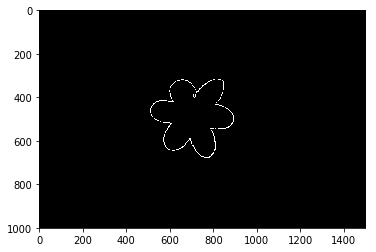

234.png


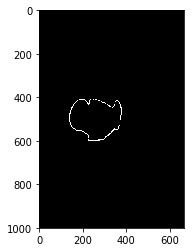

235.png


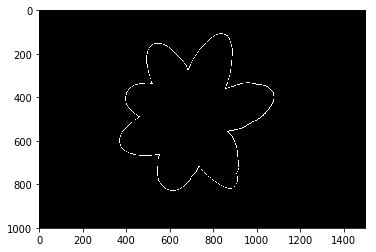

236.png


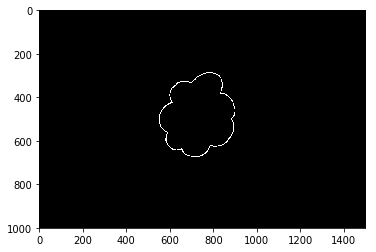

237.png


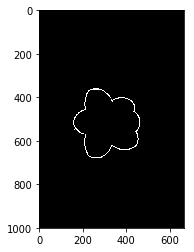

238.png


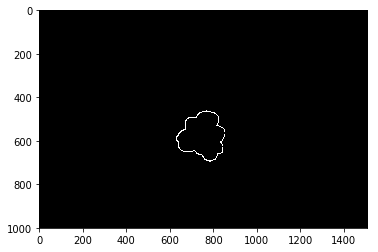

239.png


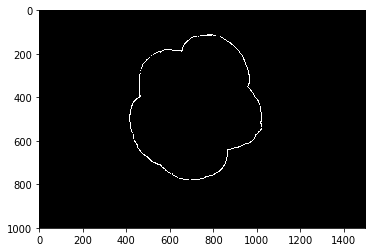

24.png


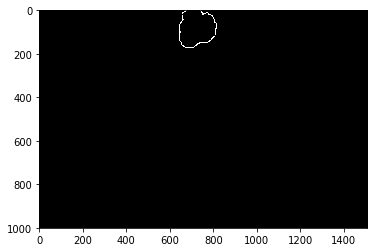

240.png


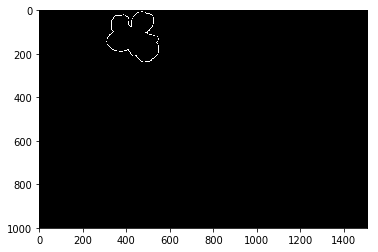

241.png


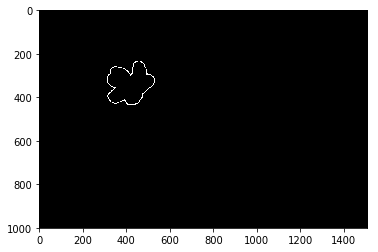

242.png


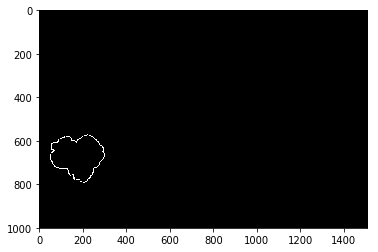

243.png


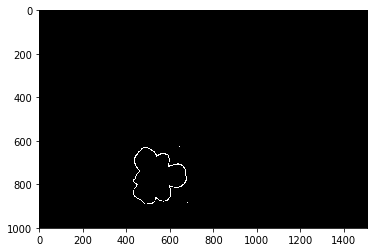

244.png


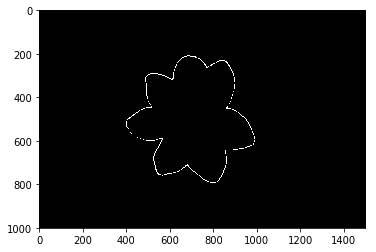

245.png


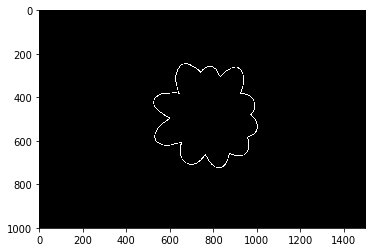

246.png


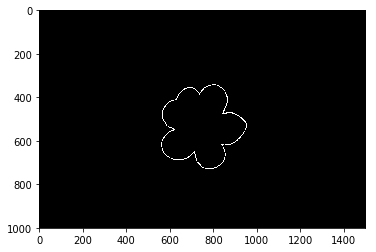

247.png


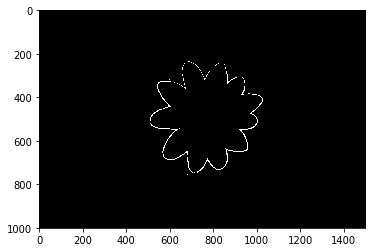

248.png


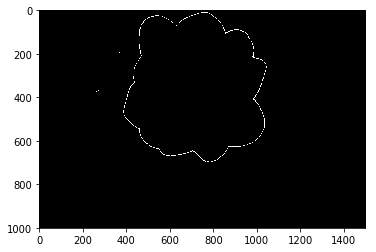

249.png


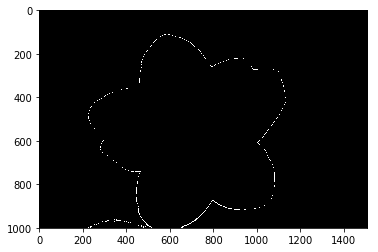

25.png


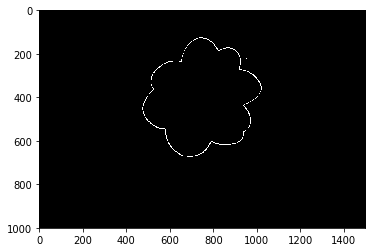

250.png


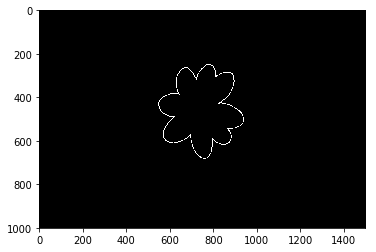

251.png


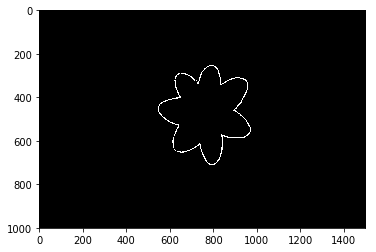

252.png


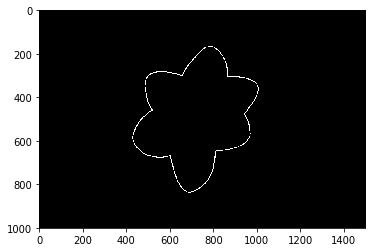

253.png


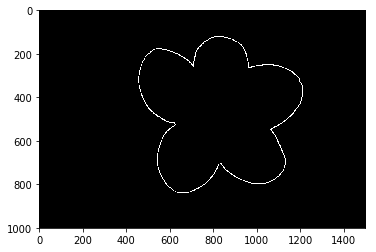

254.png


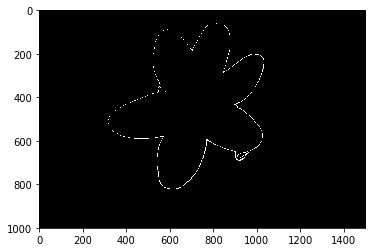

255.png


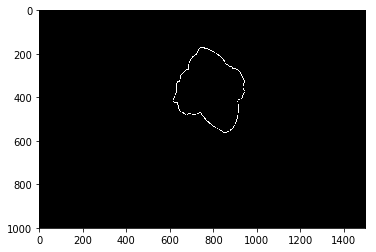

256.png


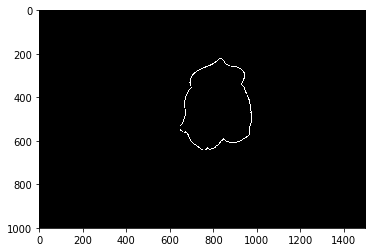

257.png


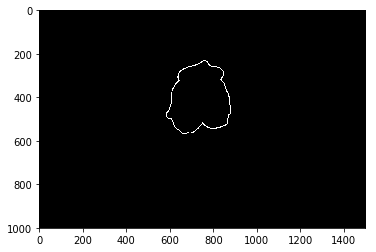

258.png


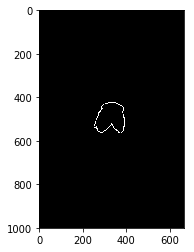

259.png


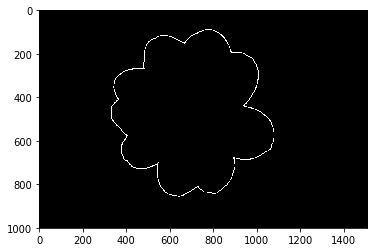

26.png


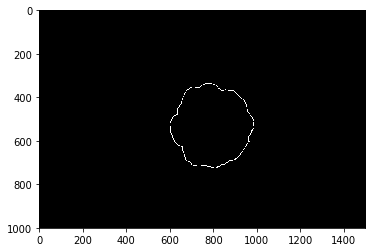

260.png


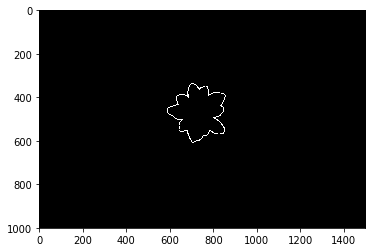

261.png


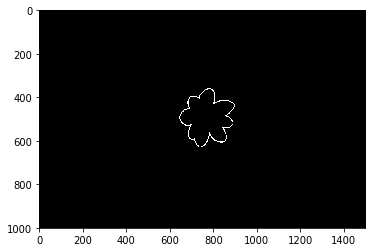

262.png


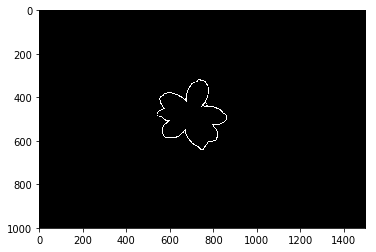

263.png


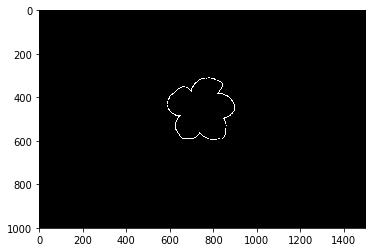

264.png


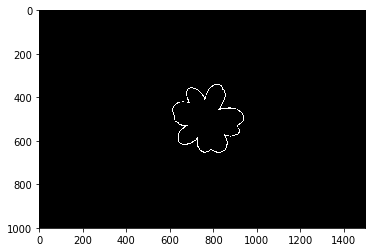

265.png


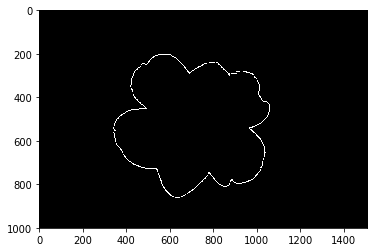

266.png


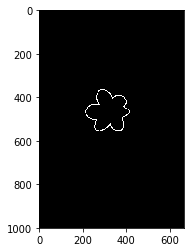

267.png


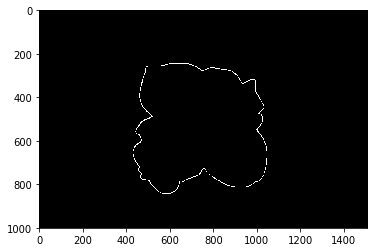

268.png


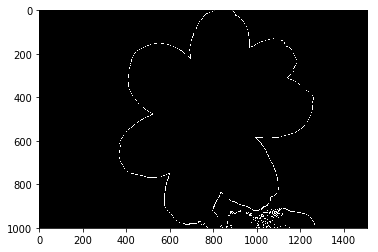

269.png


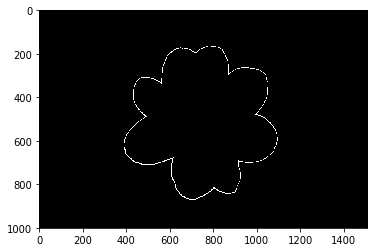

27.png


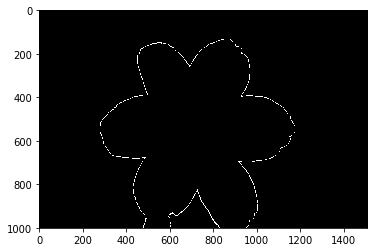

270.png


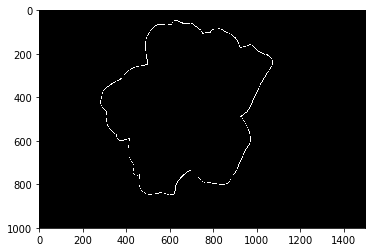

271.png


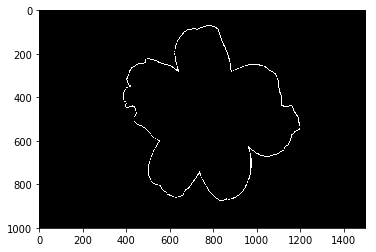

272.png


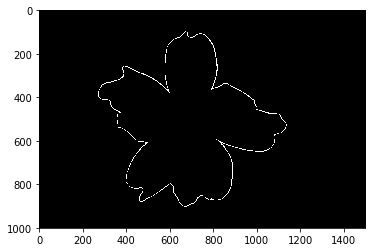

273.png


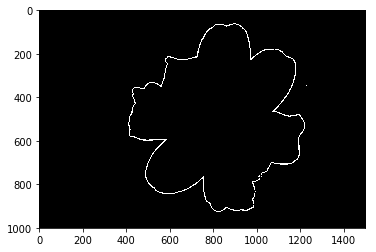

274.png


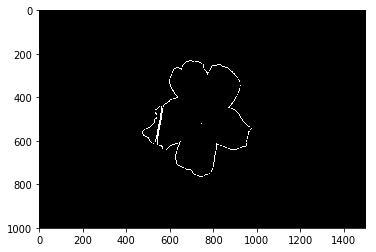

275.png


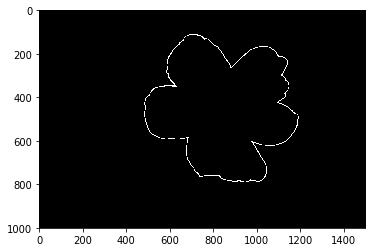

276.png


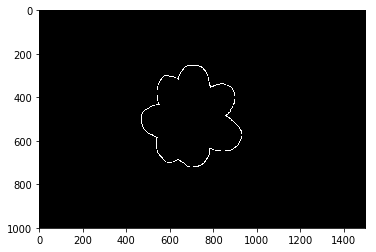

277.png


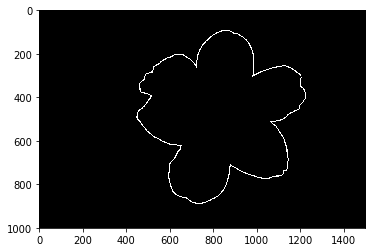

278.png


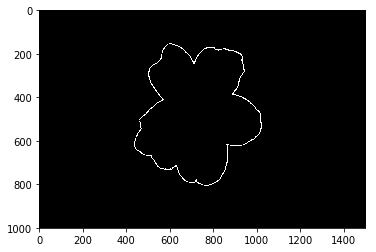

279.png


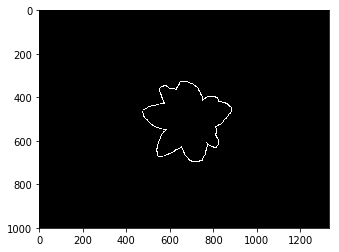

28.png


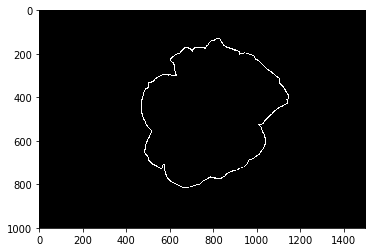

280.png


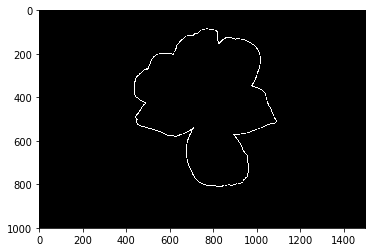

281.png


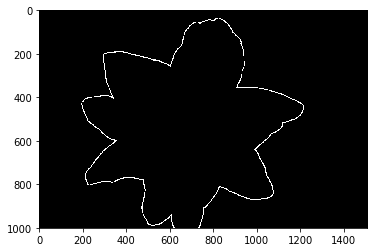

282.png


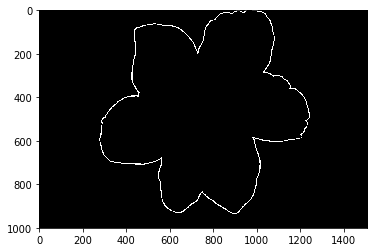

283.png


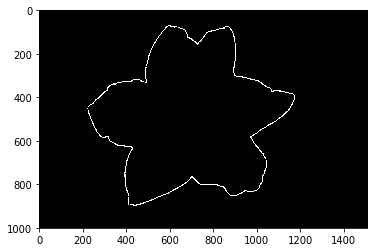

284.png


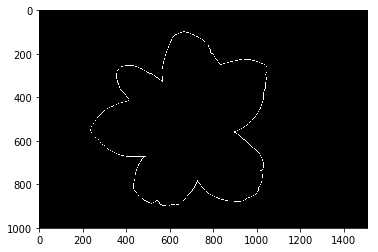

285.png


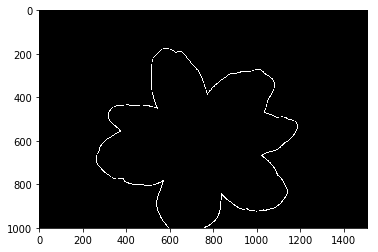

286.png


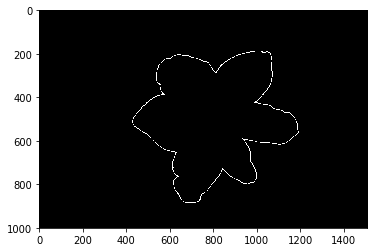

287.png


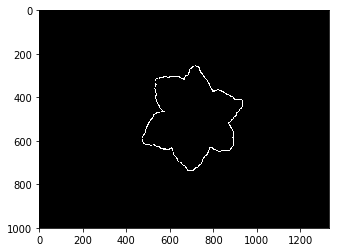

29.png


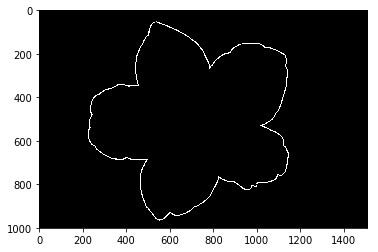

3.png


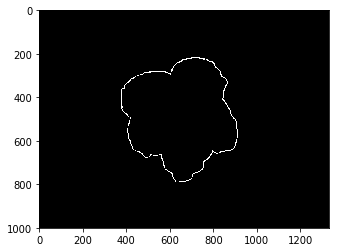

30.png


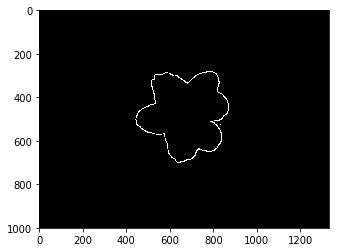

31.png


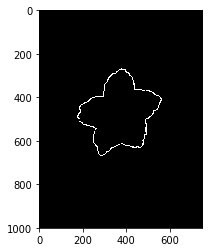

32.png


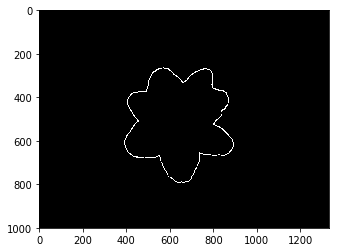

33.png


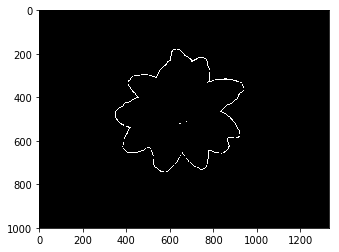

34.png


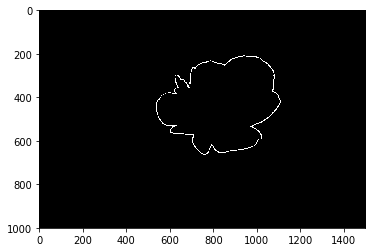

35.png


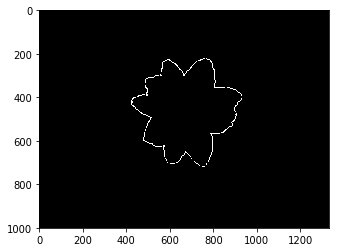

36.png


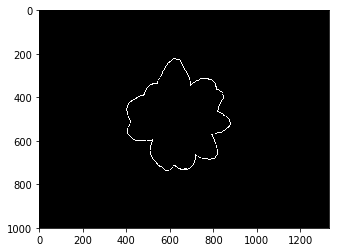

37.png


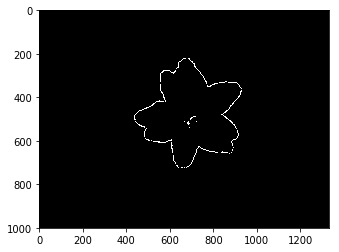

38.png


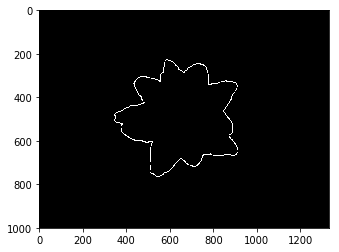

39.png


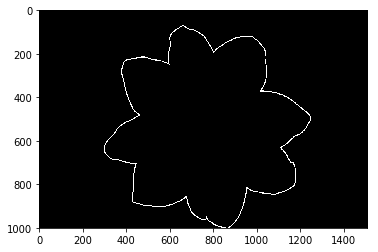

4.png


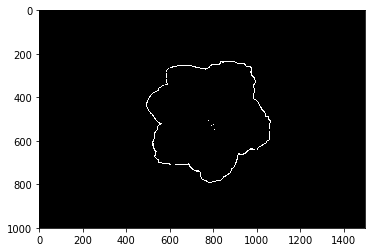

40.png


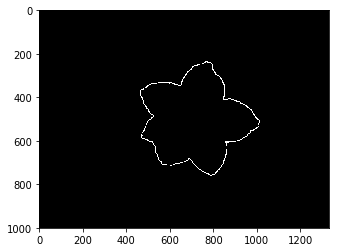

41.png


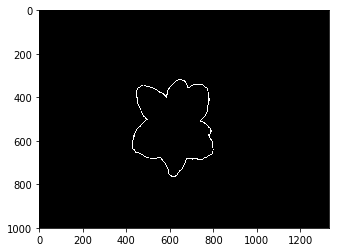

42.png


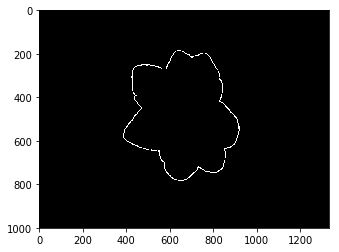

43.png


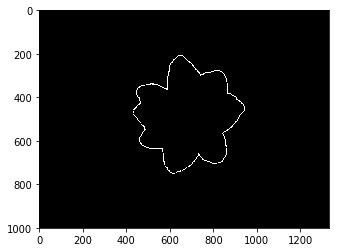

44.png


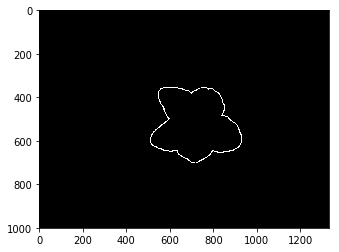

45.png


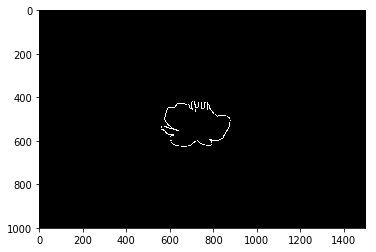

46.png


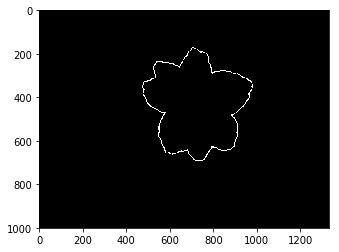

47.png


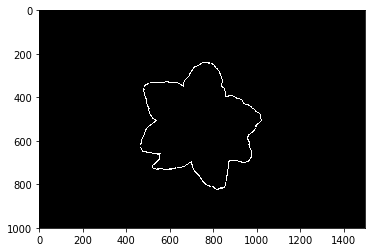

48.png


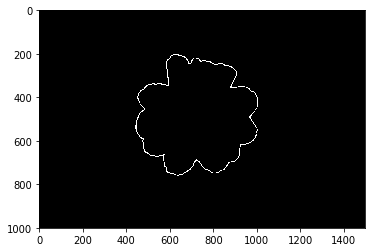

49.png


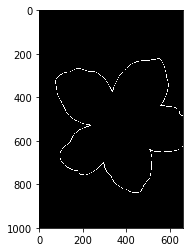

5.png


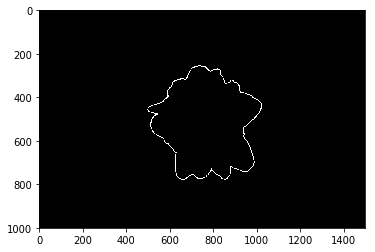

50.png


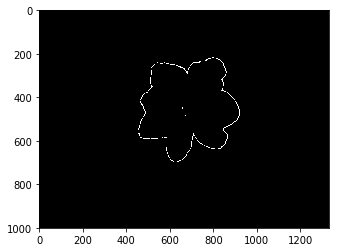

51.png


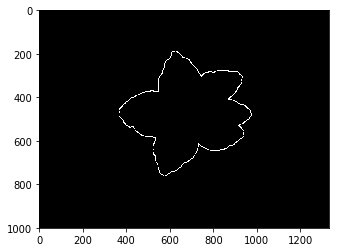

52.png


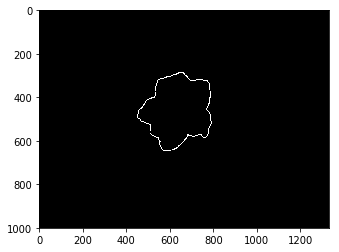

53.png


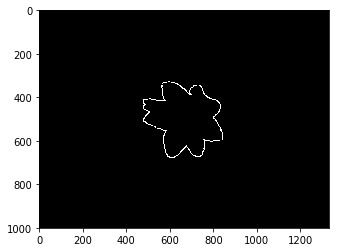

54.png


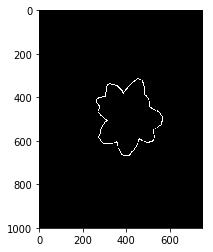

55.png


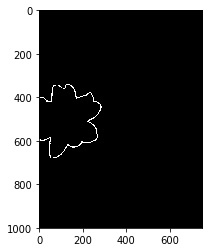

56.png


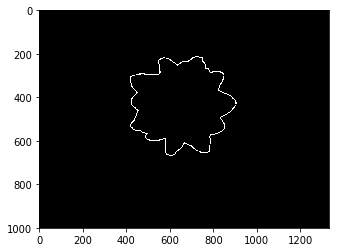

57.png


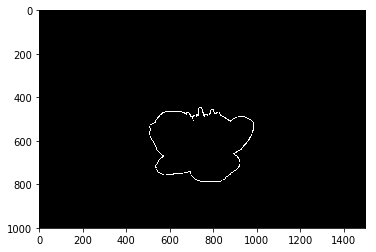

58.png


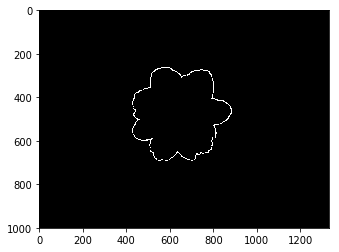

59.png


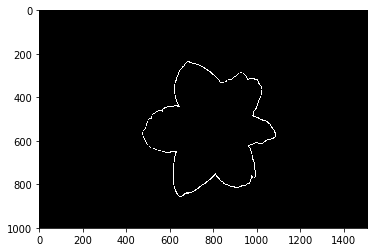

6.png


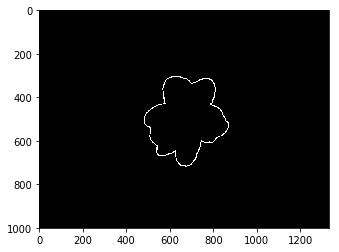

60.png


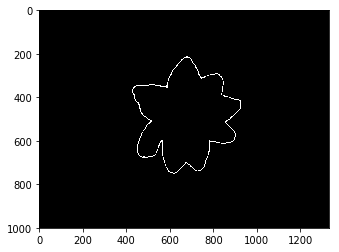

61.png


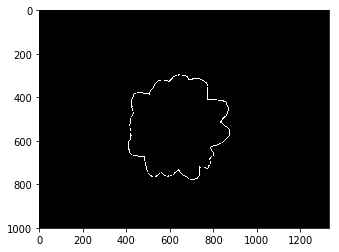

62.png


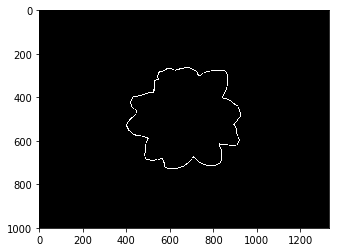

63.png


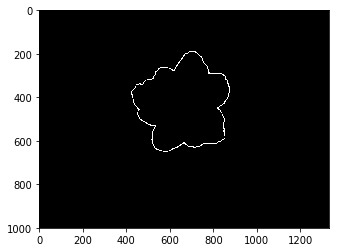

64.png


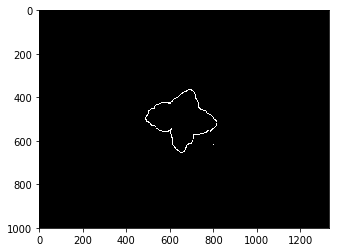

65.png


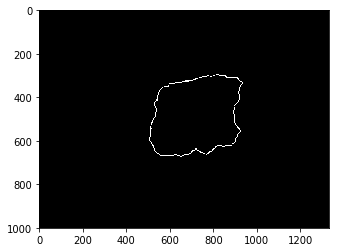

66.png


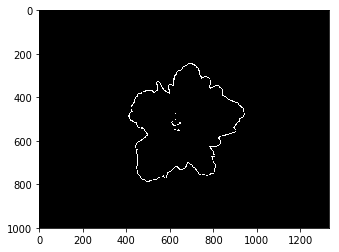

67.png


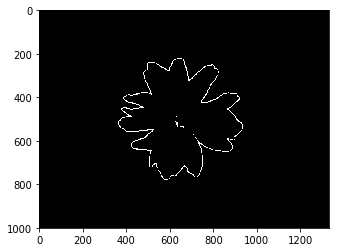

68.png


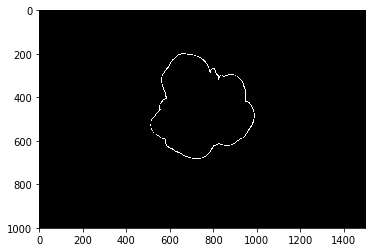

69.png


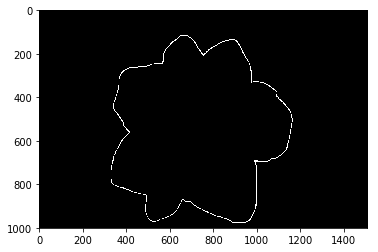

7.png


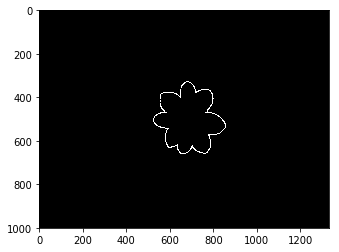

70.png


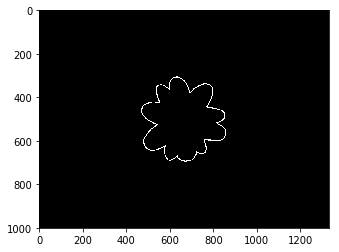

71.png


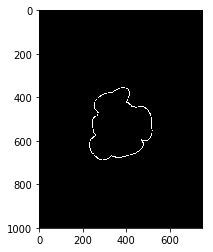

72.png


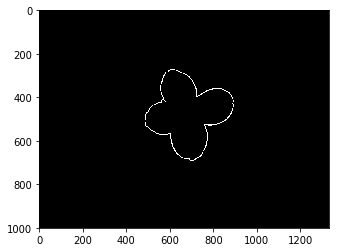

73.png


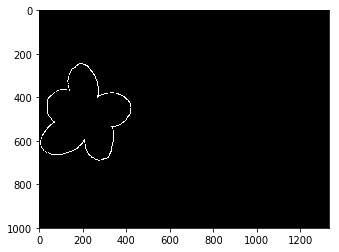

74.png


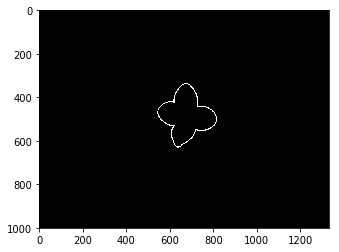

75.png


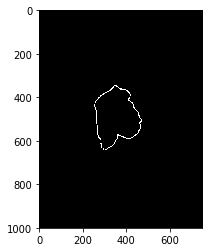

76.png


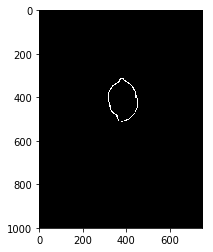

77.png


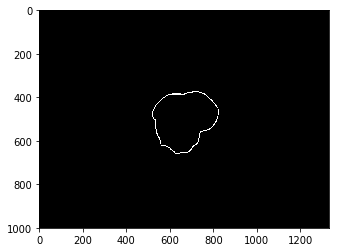

78.png


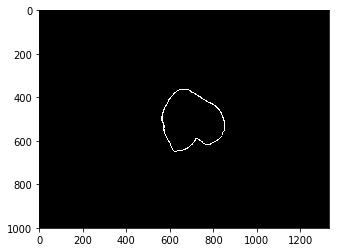

79.png


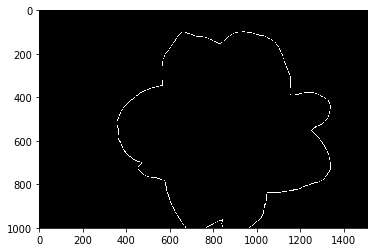

8.png


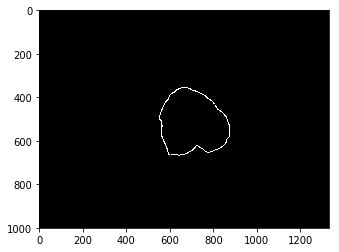

80.png


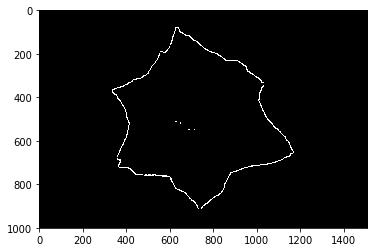

81.png


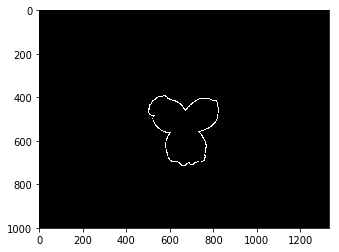

82.png


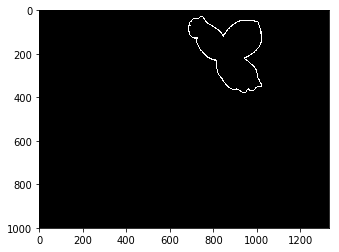

83.png


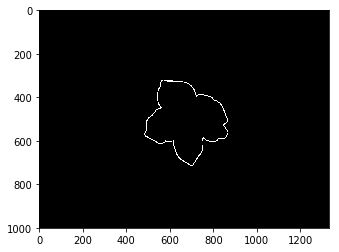

84.png


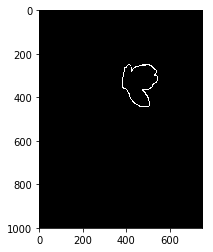

85.png


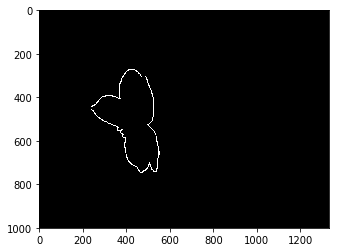

86.png


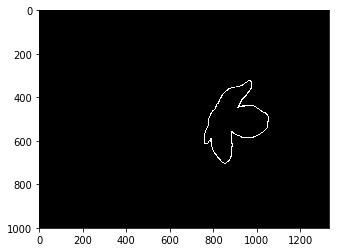

87.png


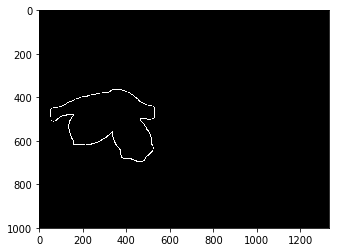

88.png


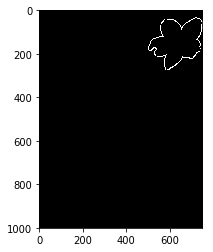

89.png


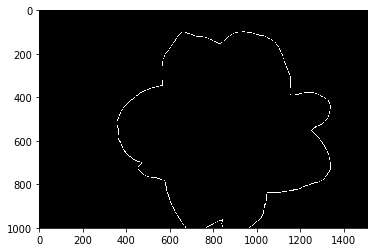

9.png


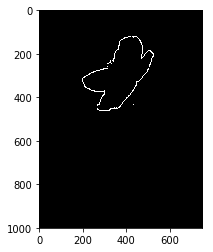

90.png


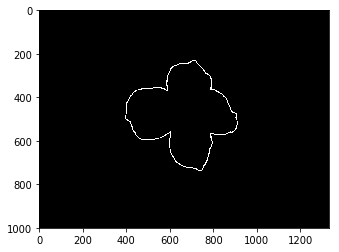

91.png


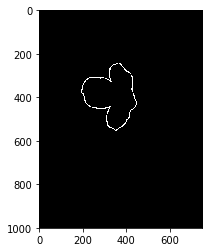

92.png


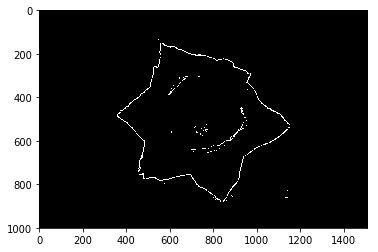

93.png


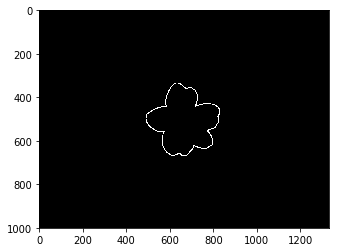

94.png


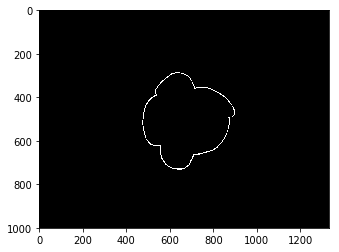

95.png


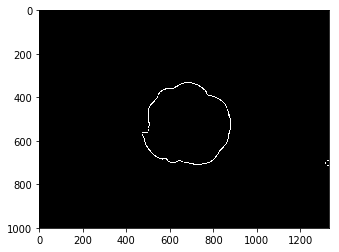

96.png


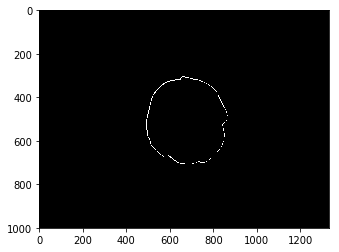

97.png


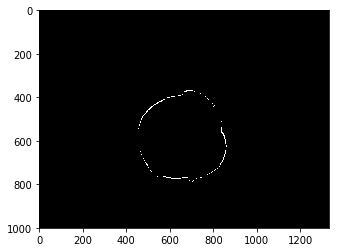

98.png


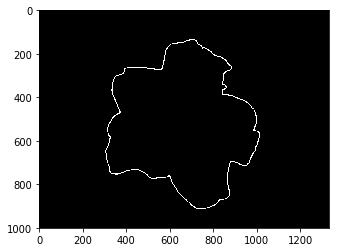

99.png


In [244]:
cnt = 0

for fname in file_names:
    img = cv2.imread('../../img/foreground/' + fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
#     plt.imshow(img),plt.show()
    img_HSV1 = cv2.GaussianBlur(img, (5, 5), 0)
    img_H, img_S, img_V = cv2.split(img_HSV1)
    _thre, img_flower = cv2.threshold(img_H, 15, 255, cv2.THRESH_BINARY)
    rgb = cv2.cvtColor(img_flower,cv2.COLOR_GRAY2RGB)
    cv2.imwrite('../../img/mask1/mask1_' + fname, rgb)
    
    img_HSV2 = cv2.blur(img, (15, 15))
    img_H, img_S, img_V = cv2.split(img_HSV2)
    _thre, img_flower = cv2.threshold(img_H, 15, 255, cv2.THRESH_BINARY)
    rgb = cv2.cvtColor(img_flower,cv2.COLOR_GRAY2RGB)
    cv2.imwrite('../../img/mask2/mask2_' + fname, rgb)
    
    mask1 = cv2.imread('../../img/mask1/mask1_' + fname)
    mask2 = cv2.imread('../../img/mask2/mask2_' + fname)
    bitwise_xor = cv2.bitwise_xor(mask1, mask2)
    cv2.imwrite('../../img/boundary/boundary' + fname, bitwise_xor)
    plt.imshow(bitwise_xor),plt.show()
    print(fname)
    

## 参考
[open cv 画像の平滑化](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_filtering/py_filtering.html)  
[領域の特徴](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_contours/py_contour_features/py_contour_features.html)  
[jupyter notebookでOpenCV 3.1を動かす(2)](https://takacity.blog.fc2.com/blog-entry-142.html)  
[絵画関数](http://opencv.jp/opencv-2svn/cpp/drawing_functions.html)  
#[]()
#[]()
#[]()
#[]()
#[]()
#[]()